In [3]:
#in this file main result plots will be generated

In [4]:
import sys
sys.path.insert(1, '../')

from pckgs.import_pckg import *
from pckgs.units import *
# importing FIRAS data
from FIRAS import *

# importing generic constants and functions
from const_func_general import *
# importing distortion specific constants and functions
from cons_func_distortion import *
#importing distortion functions
from trans_and_delta_I import *

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from pckgs.plot_params import params
import matplotlib
matplotlib.rcParams.update(params)
#plt.rcParams['font.family'] = 'DeJavu Serif'
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
# importing data for plotting
# COBE-FIRAS, McDermott et al (1911.05086)
McDermott_Witte_19_FIRAS_2Dary = np.transpose( np.array( pd.read_csv('../data/data_input_bound/McDermott_Witte_19_FIRAS.csv') ) )

# COBE-FIRAS from Caputo et al  (2002.05165): Homogeneous and Inhomogeneous
Caputo_20_FIRAS_2Dary   = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Caputo_20_FIRAS.csv') ) )
Caputo_20_FIRAS_ho_2Dary   = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Caputo_20_FIRAS_ho.csv') ) )
Caputo_20_FIRAS_inho_2Dary = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Caputo_20_FIRAS_inho.csv') ) )

# COBE-FIRAS from Mirizzi et al (0901.0014)
Mirizzi_09_FIRAS_extended_2Dary = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Mirizzi_09_FIRAS_extended.csv') ) )

# COBE-FIRAS Frozen in
frozen_FIRAS_2Dary   = np.array( pd.read_excel('../data/data_output/mAp_eps_FIRAS_ho.xlsx') )

# PIXIE Projection from Caputo et al (2002.05165): inhomogeneous
Caputo_20_PIXIE_inho_2Dary = np.array( pd.read_csv('../data/data_input_bound/Caputo_20_PIXIE_inho.csv') ) 


# Importing other experiments

# Cavendish
Cavendish_2Dary = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Cavendish.csv') ) )

# CROWS
CROWS_2Dary = np.array( pd.read_csv('../data/data_input_bound/CROWS_.csv') ) 

# Dark SRF (2301.11512 Romanenko et al)
DarkSRF_2Dary = np.array( pd.read_csv('../data/data_input_bound/DarkSRF.csv') ) 


# Dark SRF Pathfinder Projection (2203.12714 Snowmass)
DarkSRF23_Pathfinder_Proj_2Dary = np.array( pd.read_csv('../data/data_input_bound/DarkSRF23_Pathfinder_Proj_.csv') ) 

# Solar Luminosity (2304.12907 Li&Xu)
SolarLuminosity_2Dary  = np.array( pd.read_csv('../data/data_input_bound/SolarLuminosity_.csv') ) 

# Xenon Solar (2112.12116 XENON1T Solar DP)
XenonSolar_2Dary  = np.array( pd.read_csv('../data/data_input_bound/XenonSolar_.csv') ) 

# Jupyter (2312.06746 Yan&Li&Fan)
Jupiter_2Dary = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Jupiter.csv') ) )

# Earth (Phys.Rev.Lett. 73 (1994) 514-517)
Earth_2Dary   = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Earth.csv') ) )

#pure energy injection 
pure_energy_injection_2Dary =np.transpose( np.array( pd.read_csv('../data/data_output/pure_energy_injection.csv') ) )



# CMB Anisotropy (Huang et.al. 2024)
CMBAnis_Huang_2Dary = np.transpose( np.array( pd.read_csv('../data/data_input_bound/CMBAnis_Huang_24.csv') ) )



In [4]:
# mAp-eps Bound with Left(L) Extension
def Bound_with_Lext_2Dary(mAp_min_ext, N_mAp_begin, N_mAp_ext, mAp_eps_2Dary):
    
    # Left Tail
    mAp_eps_Ltail_2Dary = np.transpose( np.transpose( mAp_eps_2Dary )[:N_mAp_begin] )
    
    # Linear fit of (Log10(mAp),Log10(eps))
    (Lext_k, Lext_b) = np.polyfit(  np.log10(mAp_eps_Ltail_2Dary[0]), np.log10(mAp_eps_Ltail_2Dary[1]), 1)
    
    # mAp_min of orginal 2D ary
    mAp_min_origin = mAp_eps_Ltail_2Dary[0][0]
    
    # mAp_Lext 1D ary (include mAp_min_origin)
    mAp_Lext_ary = np.logspace( np.log10(mAp_min_ext), np.log10(mAp_min_origin), N_mAp_ext )
    
    # eps_Lext 1D ary
    eps_Lext_ary = 10**( Lext_k * np.log10(mAp_Lext_ary) + Lext_b )
    
    # mAp 1D ary (total)
    mAp_tot_ary  = np.append( mAp_Lext_ary[:-1], mAp_eps_2Dary[0] )
    
    # eps 1D ary (total)
    eps_tot_ary  = np.append( eps_Lext_ary[:-1], mAp_eps_2Dary[1] )
    
    # (mAp,eps) 2D array with extension (total)
    mAp_eps_tot_2Dary = np.vstack( (mAp_tot_ary, eps_tot_ary) )
    
    return mAp_eps_tot_2Dary

# mAp-eps Bound: Right(R) Extension
def Bound_Rext_2Dary(mAp_max_ext, N_mAp_begin, N_mAp_ext, mAp_eps_2Dary):
    
    # Right Tail
    mAp_eps_Rtail_2Dary = np.transpose( np.transpose( mAp_eps_2Dary )[-N_mAp_begin:] )
    
    # Linear fit of (Log10(mAp),Log10(eps))
    (Rext_k, Rext_b) = np.polyfit(  np.log10(mAp_eps_Rtail_2Dary[0]), np.log10(mAp_eps_Rtail_2Dary[1]), 1)
    
    # mAp_max of orginal 2D ary
    mAp_max_origin = mAp_eps_Rtail_2Dary[0][-1]
    
    # mAp_Rext 1D ary (include mAp_max_origin)
    mAp_Rext_ary = np.logspace( np.log10(mAp_max_origin), np.log10(mAp_max_ext), N_mAp_ext )
    
    # eps_Rext 1D ary
    eps_Rext_ary = 10**( Rext_k * np.log10(mAp_Rext_ary) + Rext_b )
    
    # Right extension of (mAp,eps) 2D array
    mAp_eps_Rext_2Dary = np.vstack( (mAp_Rext_ary[1:], eps_Rext_ary[1:]) )
    
    return mAp_eps_Rext_2Dary

def Append_mAp_eps_2Dary( mAp_eps_2Dary_1, mAp_eps_2Dary_2 ):
    
    mAp_ary_1 = mAp_eps_2Dary_1[0]
    mAp_ary_2 = mAp_eps_2Dary_2[0]
    
    eps_ary_1 = mAp_eps_2Dary_1[1]
    eps_ary_2 = mAp_eps_2Dary_2[1]
    
    mAp_ary_tot = np.append( mAp_ary_1, mAp_ary_2 )
    eps_ary_tot = np.append( eps_ary_1, eps_ary_2 )
    
    mAp_eps_2Dary_tot = np.vstack( (mAp_ary_tot, eps_ary_tot) )
    
    return mAp_eps_2Dary_tot

# =================================================
# Parameters for doing left/right extensions
mAp_min_plt_test = 10**(-16) # eV
mAp_max_plt_test = 10**(-1)  # eV

N_mAp_begin_L_test = 5
N_mAp_begin_R_test = 5

N_mAp_ext_L_test = 500
N_mAp_ext_R_test = 500
# =================================================
print('minimum mAp for left extension      :', mAp_min_plt_test, 'eV' )
print('maximum mAp for right extension     :', mAp_max_plt_test, 'eV' )
print('')
print('N_mAp to begin the left extension   :', N_mAp_begin_L_test)
print('N_mAp to begin the right extension  :', N_mAp_begin_R_test)
print('')
print('N_mAp for the left extension        :', N_mAp_ext_L_test)
print('N_mAp for the right extension       :', N_mAp_ext_R_test)

minimum mAp for left extension      : 1e-16 eV
maximum mAp for right extension     : 0.1 eV

N_mAp to begin the left extension   : 5
N_mAp to begin the right extension  : 5

N_mAp for the left extension        : 500
N_mAp for the right extension       : 500


In [5]:
# COBE-FIRAS constraint (fiducial)
mAp_eps_FIRAS_fidu_2Dary = np.array( pd.read_excel('../data/data_output/mAp_eps_FIRAS_fidu_.xlsx') )


# PIXIE projection (fiducial, high redshift)
mAp_eps_PIXIE_fidu_2Dary = np.array( pd.read_excel('../data/data_output/mAp_eps_PIXIE_fidu.xlsx') )


# COBE-FIRAS from Caputo 2020: Homogeneous and Inhomogeneous
Caputo_20_FIRAS_ho_2Dary   = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Caputo_20_FIRAS_ho.csv') ) )
Caputo_20_FIRAS_inho_2Dary = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Caputo_20_FIRAS_inho.csv') ) )

# PIXIE Projection from Caputo 2020: Inhomogeneous
Caputo_20_PIXIE_inho_2Dary = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Caputo_20_PIXIE_inho.csv') ) )

PIXIE_rescale = 0.8

Caputo_20_PIXIE_inho_2Dary = np.vstack((Caputo_20_PIXIE_inho_2Dary[[0]], PIXIE_rescale * Caputo_20_PIXIE_inho_2Dary[[1]]))

# COBE-FIRAS from Xucheng: Homogeneous
Xucheng_FIRAS_ho_2Dary   = np.array( pd.read_excel('../data/data_output/mAp_eps_FIRAS_ho_.xlsx') )


mAp_FIRAS_ho = Xucheng_FIRAS_ho_2Dary[0]
eps_FIRAS_ho = Xucheng_FIRAS_ho_2Dary[1]

In [6]:
# ====================================================
# Different eras: z and mAp ranges

# Boundary of mu-y transition era
z_trans_0   = 10**3
z_trans_1   = 10**4
z_trans_2   = 3 * 10**5
z_dcs       = 2 * 10**6  # Redshif of double Compton scattering
z_max       = 10**10   # We just choose some very large z_max value

mAp_trans_0 = np.sqrt( mAsq(z_trans_0, 0) ) # in eV
mAp_trans_1 = np.sqrt( mAsq(z_trans_1, 0) ) # in eV
mAp_trans_2 = np.sqrt( mAsq(z_trans_2, 0) ) # in eV
mAp_dcs     = np.sqrt( mAsq(z_dcs, 0) )     # in eV
mAp_max     = np.sqrt( mAsq(z_max, 0) )     # in eV

# ====================================================

# Hongwan20 COBE-FIRAS constraint
mAp_Caputo_20_FIRAS_inho   = Caputo_20_FIRAS_inho_2Dary[0]  # mAp list
eps_Caputo_20_FIRAS_inho   = Caputo_20_FIRAS_inho_2Dary[1]  # eps list

# Hongwan20 PIXIE projection
mAp_Caputo_20_PIXIE_inho   = Caputo_20_PIXIE_inho_2Dary[0]  # mAp list
eps_Caputo_20_PIXIE_inho   = Caputo_20_PIXIE_inho_2Dary[1]  # eps list


# Fiducial (mAp,eps) FIRAS/PIXIE
mAp_fidu_FIRAS = mAp_eps_FIRAS_fidu_2Dary[0]
eps_fidu_FIRAS = mAp_eps_FIRAS_fidu_2Dary[1]

mAp_fidu_PIXIE = mAp_eps_PIXIE_fidu_2Dary[0]
eps_fidu_PIXIE = mAp_eps_PIXIE_fidu_2Dary[1]





# mAp_min/max of dashed region
# mAp_min_dashed = 4.7*10**(-7)  # eV
mAp_min_dashed = 3.2*10**(-7)  # eV
mAp_mid_dashed = mAp_trans_2 # eV
mAp_max_dashed = 1 * mAp_trans_2 # eV




# Fiducial (mAp,eps) FIRAS/PIXIE: Left(L)
mAp_fidu_L_FIRAS = mAp_fidu_FIRAS[mAp_fidu_FIRAS<mAp_min_dashed]
eps_fidu_L_FIRAS = eps_fidu_FIRAS[mAp_fidu_FIRAS<mAp_min_dashed]

mAp_fidu_L_PIXIE = mAp_fidu_PIXIE[mAp_fidu_PIXIE<mAp_min_dashed]
eps_fidu_L_PIXIE = eps_fidu_PIXIE[mAp_fidu_PIXIE<mAp_min_dashed]

# Fiducial (mAp,eps) FIRAS/PIXIE: Right(R)
mAp_fidu_R_FIRAS = mAp_fidu_FIRAS[mAp_fidu_FIRAS>mAp_mid_dashed]
eps_fidu_R_FIRAS = eps_fidu_FIRAS[mAp_fidu_FIRAS>mAp_mid_dashed]

mAp_fidu_R_PIXIE = mAp_fidu_PIXIE[mAp_fidu_PIXIE>mAp_mid_dashed]
eps_fidu_R_PIXIE = eps_fidu_PIXIE[mAp_fidu_PIXIE>mAp_mid_dashed]

# Fiducial (mAp,eps) FIRAS/PIXIE: Middle(M)
mAp_fidu_M_FIRAS = mAp_fidu_FIRAS[np.logical_and(mAp_fidu_FIRAS>=mAp_min_dashed,mAp_fidu_FIRAS<=mAp_mid_dashed)]
eps_fidu_M_FIRAS = eps_fidu_FIRAS[np.logical_and(mAp_fidu_FIRAS>=mAp_min_dashed,mAp_fidu_FIRAS<=mAp_mid_dashed)]

mAp_fidu_M_PIXIE = mAp_fidu_PIXIE[np.logical_and(mAp_fidu_PIXIE>=mAp_min_dashed,mAp_fidu_PIXIE<=mAp_mid_dashed)]
eps_fidu_M_PIXIE = eps_fidu_PIXIE[np.logical_and(mAp_fidu_PIXIE>=mAp_min_dashed,mAp_fidu_PIXIE<=mAp_mid_dashed)]




# Fiducial (mAp,eps) FIRAS/PIXIE: inhomogenenous extension
mAp_fidu_inho_FIRAS = mAp_Caputo_20_FIRAS_inho[ mAp_Caputo_20_FIRAS_inho < mAp_fidu_L_FIRAS[0] ]
eps_fidu_inho_FIRAS = eps_Caputo_20_FIRAS_inho[ mAp_Caputo_20_FIRAS_inho < mAp_fidu_L_FIRAS[0] ]

mAp_fidu_inho_PIXIE = mAp_Caputo_20_PIXIE_inho[ mAp_Caputo_20_PIXIE_inho < mAp_fidu_L_PIXIE[0] ]
eps_fidu_inho_PIXIE = eps_Caputo_20_PIXIE_inho[ mAp_Caputo_20_PIXIE_inho < mAp_fidu_L_PIXIE[0] ]


# Fiducial (mAp,eps) FIRAS/PIXIE: Left with inhomogeneous extension (Lext)
mAp_fidu_Lext_FIRAS = np.append( mAp_fidu_inho_FIRAS , mAp_fidu_L_FIRAS )
eps_fidu_Lext_FIRAS = np.append( eps_fidu_inho_FIRAS , eps_fidu_L_FIRAS )

mAp_fidu_Lext_PIXIE = np.append( mAp_fidu_inho_PIXIE , mAp_fidu_L_PIXIE )
eps_fidu_Lext_PIXIE = np.append( eps_fidu_inho_PIXIE , eps_fidu_L_PIXIE )



# Fiducial (mAp,eps) FIRAS/PIXIE: Total with inhomogeneous extension
mAp_fidu_tot_FIRAS  = np.append( mAp_fidu_inho_FIRAS , mAp_fidu_FIRAS )
eps_fidu_tot_FIRAS  = np.append( eps_fidu_inho_FIRAS , eps_fidu_FIRAS )

mAp_fidu_tot_PIXIE  = np.append( mAp_fidu_inho_PIXIE , mAp_fidu_PIXIE )
eps_fidu_tot_PIXIE  = np.append( eps_fidu_inho_PIXIE , eps_fidu_PIXIE )

mAp_eps_fidu_tot_2Dary_FIRAS = np.vstack((mAp_fidu_tot_FIRAS,eps_fidu_tot_FIRAS))
mAp_eps_fidu_tot_2Dary_PIXIE = np.vstack((mAp_fidu_tot_PIXIE,eps_fidu_tot_PIXIE))


# ==================================================================================
# Fiducial (mAp,eps) FIRAS/PIXIE (Truncated for large mAp when eps>10^-6)

eps_cut = 1e-6
mAp_cut = 1e-7


mAp_fidu_truncate_FIRAS = []
eps_fidu_truncate_FIRAS = []

mAp_fidu_truncate_PIXIE = []
eps_fidu_truncate_PIXIE = []


for i in range(0,len(mAp_fidu_FIRAS)-1):
    
    if eps_fidu_FIRAS[i]<eps_cut or mAp_fidu_FIRAS[i]<mAp_cut:
        mAp_fidu_truncate_FIRAS.append(mAp_fidu_FIRAS[i])
        eps_fidu_truncate_FIRAS.append(eps_fidu_FIRAS[i])
        
for i in range(0,len(mAp_fidu_PIXIE)-1):
    
    if eps_fidu_PIXIE[i]<eps_cut or mAp_fidu_PIXIE[i]<mAp_cut:
        mAp_fidu_truncate_PIXIE.append(mAp_fidu_PIXIE[i])
        eps_fidu_truncate_PIXIE.append(eps_fidu_PIXIE[i])
        
mAp_fidu_truncate_FIRAS = np.array(mAp_fidu_truncate_FIRAS)
eps_fidu_truncate_FIRAS = np.array(eps_fidu_truncate_FIRAS)

mAp_fidu_truncate_PIXIE = np.array(mAp_fidu_truncate_PIXIE)
eps_fidu_truncate_PIXIE = np.array(eps_fidu_truncate_PIXIE)


# Fiducial (mAp,eps) COBIE-FIRAS constraint (truncated): Total with inhomogeneous extension
mAp_fidu_tot_truncate_FIRAS  = np.append( mAp_fidu_inho_FIRAS , mAp_fidu_truncate_FIRAS )
eps_fidu_tot_truncate_FIRAS  = np.append( eps_fidu_inho_FIRAS , eps_fidu_truncate_FIRAS )

mAp_fidu_tot_truncate_PIXIE  = np.append( mAp_fidu_inho_PIXIE , mAp_fidu_truncate_PIXIE )
eps_fidu_tot_truncate_PIXIE  = np.append( eps_fidu_inho_PIXIE , eps_fidu_truncate_PIXIE )

mAp_eps_fidu_tot_truncated_2D_FIRAS = np.vstack((mAp_fidu_tot_truncate_FIRAS,eps_fidu_tot_truncate_FIRAS))
mAp_eps_fidu_tot_truncated_2D_PIXIE = np.vstack((mAp_fidu_tot_truncate_PIXIE,eps_fidu_tot_truncate_PIXIE))



In [7]:
#########################################################
# Output (mAp,eps) 2D array
#########################################################

# -------------------------------------------------------
# (mAp,eps): 2D array
mAp_eps_output_2Dary_pdform_FIRAS = pd.DataFrame(np.transpose(mAp_eps_fidu_tot_truncated_2D_FIRAS))
mAp_eps_output_2Dary_pdform_FIRAS.to_excel('../data/data_output/mAp_eps_output_2Dary_FIRAS.xlsx', index=False)

In [8]:
# Caputo20 PIXIE projection inhomogeneous   (original with L_extension)
Caputo_20_PIXIE_inho_2Dary_with_Lext = Bound_with_Lext_2Dary(mAp_min_plt_test, N_mAp_begin_L_test, N_mAp_ext_L_test, Caputo_20_PIXIE_inho_2Dary)

mAp_20_PIXIE_inho_2Dary_with_Lext =Caputo_20_PIXIE_inho_2Dary_with_Lext[0]
eps_20_PIXIE_inho_2Dary_with_Lext = Caputo_20_PIXIE_inho_2Dary_with_Lext[1]


# CROWS               (original with R-extension)
CROWS_2Dary_Rext = Bound_Rext_2Dary(mAp_max_plt_test, N_mAp_begin_R_test, N_mAp_ext_R_test, CROWS_2Dary)

CROWS_2Dary_with_Rext  = Append_mAp_eps_2Dary(CROWS_2Dary, CROWS_2Dary_Rext)

# Dark SRF:exclusion  (original with L/R-extension)
DarkSRF_2Dary_with_Lext         = Bound_with_Lext_2Dary(mAp_min_plt_test, N_mAp_begin_L_test, N_mAp_ext_L_test, DarkSRF_2Dary)
DarkSRF_2Dary_Rext              = Bound_Rext_2Dary(mAp_max_plt_test, N_mAp_begin_R_test, N_mAp_ext_R_test, DarkSRF_2Dary)

DarkSRF_2Dary_with_LRext        = Append_mAp_eps_2Dary(DarkSRF_2Dary_with_Lext, DarkSRF_2Dary_Rext)

# Dark SRF:projection (original with L/R-extension)
DarkSRF_Proj_2Dary_with_Lext    = Bound_with_Lext_2Dary(mAp_min_plt_test, N_mAp_begin_L_test, N_mAp_ext_L_test, DarkSRF23_Pathfinder_Proj_2Dary)
DarkSRF_Proj_2Dary_Rext         = Bound_Rext_2Dary(mAp_max_plt_test, N_mAp_begin_R_test, N_mAp_ext_R_test, DarkSRF23_Pathfinder_Proj_2Dary)

DarkSRF_Proj_2Dary_with_LRext   = Append_mAp_eps_2Dary(DarkSRF_Proj_2Dary_with_Lext, DarkSRF_Proj_2Dary_Rext)



# Xenon Solar         (original with L-extension)
XenonSolar_2Dary_with_Lext      = Bound_with_Lext_2Dary(mAp_min_plt_test, N_mAp_begin_L_test, N_mAp_ext_L_test, XenonSolar_2Dary)

# SolarLuminosity     (original with L-extension)
SolarLuminosity_2Dary_with_Lext = Bound_with_Lext_2Dary(mAp_min_plt_test, N_mAp_begin_L_test, N_mAp_ext_L_test, SolarLuminosity_2Dary)

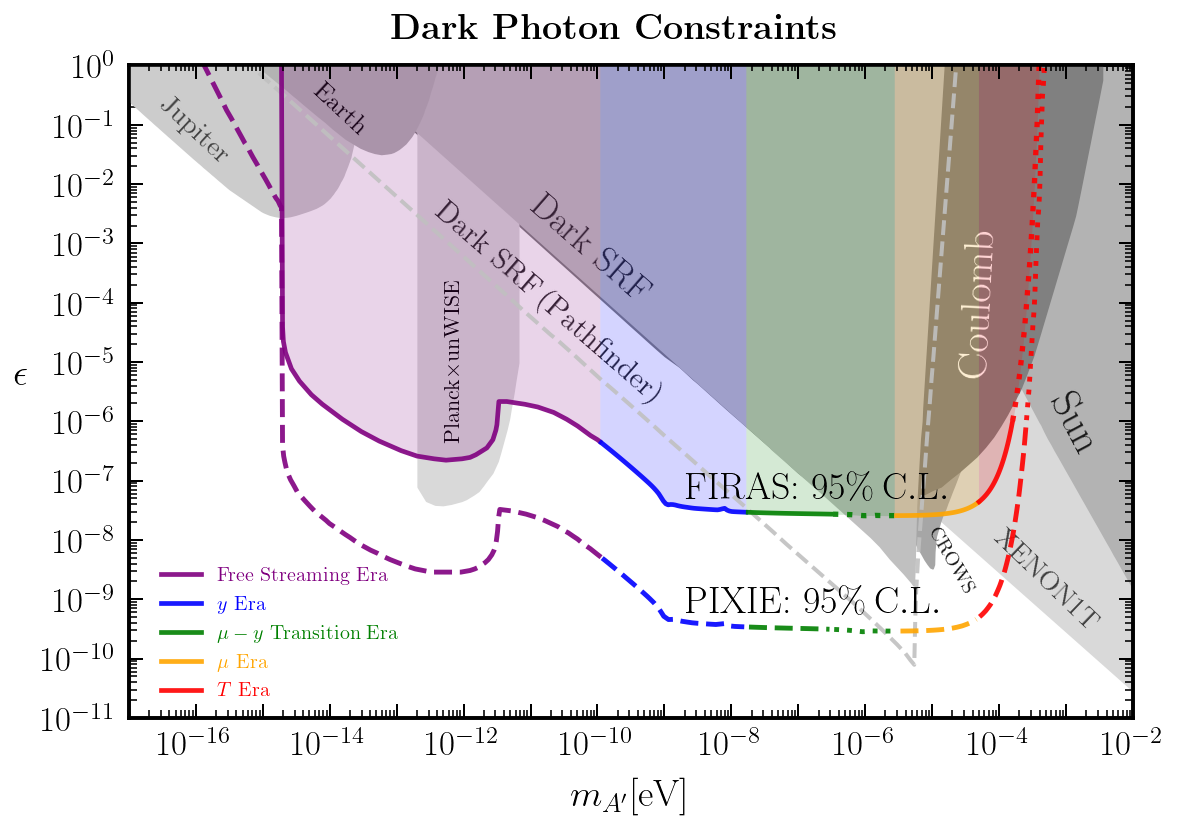

In [9]:
# ====================================================
# Plot Parameters
mAp_pltmin = 1e-17 # eV
mAp_pltmax = 1e-2  # eV

eps_pltmin = 1e-11
eps_pltmax = 1e0

majortick_len = 7 # length of major tick
minortick_len = 4 # length of minor tick

twin_majortick_len = majortick_len  # length of twin major tick
twin_minortick_len = minortick_len  # length of twin minor tick

# ====================================================
# color for different eras
color_free = 'purple'
color_y    = 'blue'
color_trans= 'green'
color_mu   = 'orange'
color_T    = 'red'
# ====================================================

set_matplotlib_formats('retina')

fig, ax = plt.subplots()

ax1 = ax.twiny()

fig.set_size_inches(9, 6)

ax.set_xscale('log')
ax.set_yscale('log')
ax1.set_xscale('log')    # twin_y axis
ax1.set_yscale('log')    # twin_y axis


ax.set_xlim(mAp_pltmin, mAp_pltmax)
ax.set_ylim(eps_pltmin, eps_pltmax)
ax1.set_xlim(mAp_pltmin, mAp_pltmax)    # twin_y axis
ax1.set_ylim(eps_pltmin, eps_pltmax)    # twin_y axis


# color_XenonSolar       = lighten_color('gray', 0.3)
# color_SolarLuminosity  = lighten_color('gray', 0.6)
# color_Cavendish        = lighten_color('gray', 1)
# color_CROW             = lighten_color('gray', 0.7)
# color_DarkSRF          = lighten_color('gray', 0.3)
# color_Jupyter          = lighten_color('gray', 0.4)
# color_Earth            = lighten_color('gray', 0.6)


# color_XenonSolar_label       = lighten_color('gray', 1.5)
# color_SolarLuminosity_label  = lighten_color('black', 0.9)
# color_Cavendish_label        = lighten_color('white', 1)
# color_CROW_label             = lighten_color('gray', 1.8)
# color_DarkSRF_label          = lighten_color('gray', 1.7)
# color_Jupyter_label          = lighten_color('gray', 1.5)
# color_Earth_label            = lighten_color('gray', 2)

color_XenonSolar        = lighten_color('gray', 0.3)
color_SolarLuminosity   = lighten_color('gray', 0.6)
color_Cavendish         = lighten_color('gray', 1)
color_CROW              = lighten_color('gray', 0.7)
color_DarkSRF           = lighten_color('gray', 0.5)
color_Jupyter           = lighten_color('gray', 0.4)
color_Earth             = lighten_color('gray', 0.6)
color_CMBAnis_Huang     = lighten_color('gray', 0.3)


color_XenonSolar_label        = lighten_color('gray', 1.5)
color_SolarLuminosity_label   = lighten_color('black', 0.9)
color_Cavendish_label         = lighten_color('white', 1)
color_CROW_label              = lighten_color('gray', 1.8)
color_DarkSRF_label           = lighten_color('gray', 1.7)
color_Jupyter_label           = lighten_color('gray', 1.5)
color_Earth_label             = lighten_color('gray', 2)
color_CMBAnis_Huang_label     = lighten_color('gray', 2)

# Xenon-1T Solar (2112.12116 XENON1T Solar DP)
ax.fill_between(  XenonSolar_2Dary_with_Lext[0], XenonSolar_2Dary_with_Lext[1], max(XenonSolar_2Dary_with_Lext[1]), color=color_XenonSolar, alpha=1, zorder=0)

# Solar Luminosity (2304.12907 Li&Xu)
ax.fill_between(  SolarLuminosity_2Dary_with_Lext[0], SolarLuminosity_2Dary_with_Lext[1], max(SolarLuminosity_2Dary_with_Lext[1]), color=color_SolarLuminosity, alpha=1, zorder=1)

# Cavendish-Coulomb
ax.fill_between(  Cavendish_2Dary[0], Cavendish_2Dary[1], max(Cavendish_2Dary[1]), color=color_Cavendish, alpha=1, zorder=3)

# CROWS
ax.fill_between(  CROWS_2Dary_with_Rext[0], CROWS_2Dary_with_Rext[1], max(CROWS_2Dary_with_Rext[1]), color=color_CROW, alpha=1)

# Dark SRF Exclusion (2301.11512 Romanenko etc)
ax.fill_between(  DarkSRF_2Dary_with_LRext[0], DarkSRF_2Dary_with_LRext[1], max(DarkSRF_2Dary_with_LRext[1]), color=color_DarkSRF, alpha=1, zorder=5)

# Dark SRF Pathfinder Projection (2203.12714 Snowmass)
ax.plot(          DarkSRF_Proj_2Dary_with_LRext[0], DarkSRF_Proj_2Dary_with_LRext[1], color=color_DarkSRF, linestyle = 'dashed', linewidth=2.0, zorder=10)

# Jupyter
ax.fill_between(  Jupiter_2Dary[0], Jupiter_2Dary[1], max(Jupiter_2Dary[1]), color=color_Jupyter, alpha=1, zorder=5)

# Earth
ax.fill_between(  Earth_2Dary[0]  , Earth_2Dary[1]  , max(Earth_2Dary[1])  , color=color_Earth  , alpha=1, zorder=7)


# CMB Anisotropy (Huang et.al.)
ax.fill_between(  CMBAnis_Huang_2Dary[0]  , CMBAnis_Huang_2Dary[1]  , max(CMBAnis_Huang_2Dary[1])  , color=color_CMBAnis_Huang  , alpha=1, zorder=3)

# ======================================================================================
# FIRAS/PIXIE Plot Arrays: mAp and eps

# free streaming era
mAp_FIRAS_ary_free          = mAp_fidu_Lext_FIRAS[mAp_fidu_Lext_FIRAS<=mAp_trans_0]
eps_FIRAS_ary_free          = eps_fidu_Lext_FIRAS[mAp_fidu_Lext_FIRAS<=mAp_trans_0]

mAp_PIXIE_ary_free          = mAp_fidu_Lext_PIXIE[mAp_fidu_Lext_PIXIE<=mAp_trans_0]
eps_PIXIE_ary_free          = eps_fidu_Lext_PIXIE[mAp_fidu_Lext_PIXIE<=mAp_trans_0]

# y era
mAp_FIRAS_ary_y             = mAp_fidu_Lext_FIRAS[np.logical_and(mAp_fidu_Lext_FIRAS>mAp_trans_0,mAp_fidu_Lext_FIRAS<=mAp_trans_1)]
eps_FIRAS_ary_y             = eps_fidu_Lext_FIRAS[np.logical_and(mAp_fidu_Lext_FIRAS>mAp_trans_0,mAp_fidu_Lext_FIRAS<mAp_trans_1)]

mAp_PIXIE_ary_y             = mAp_fidu_Lext_PIXIE[np.logical_and(mAp_fidu_Lext_PIXIE>mAp_trans_0,mAp_fidu_Lext_PIXIE<=mAp_trans_1)]
eps_PIXIE_ary_y             = eps_fidu_Lext_PIXIE[np.logical_and(mAp_fidu_Lext_PIXIE>mAp_trans_0,mAp_fidu_Lext_PIXIE<mAp_trans_1)]

# transition era (solid)
mAp_FIRAS_ary_trans_solid   = mAp_fidu_Lext_FIRAS[np.logical_and(mAp_fidu_Lext_FIRAS>mAp_trans_1,mAp_fidu_Lext_FIRAS<=mAp_trans_2)]
eps_FIRAS_ary_trans_solid   = eps_fidu_Lext_FIRAS[np.logical_and(mAp_fidu_Lext_FIRAS>mAp_trans_1,mAp_fidu_Lext_FIRAS<mAp_trans_2)]

mAp_PIXIE_ary_trans_solid   = mAp_fidu_Lext_PIXIE[np.logical_and(mAp_fidu_Lext_PIXIE>mAp_trans_1,mAp_fidu_Lext_PIXIE<=mAp_trans_2)]
eps_PIXIE_ary_trans_solid   = eps_fidu_Lext_PIXIE[np.logical_and(mAp_fidu_Lext_PIXIE>mAp_trans_1,mAp_fidu_Lext_PIXIE<mAp_trans_2)]

# transition era (dotted)
mAp_FIRAS_ary_trans_dotted  = mAp_fidu_M_FIRAS
eps_FIRAS_ary_trans_dotted  = eps_fidu_M_FIRAS

mAp_PIXIE_ary_trans_dotted  = mAp_fidu_M_PIXIE
eps_PIXIE_ary_trans_dotted  = eps_fidu_M_PIXIE

# transition era (total)
mAp_FIRAS_ary_trans         = np.append(mAp_FIRAS_ary_trans_solid,mAp_FIRAS_ary_trans_dotted)
eps_FIRAS_ary_trans         = np.append(eps_FIRAS_ary_trans_solid,eps_FIRAS_ary_trans_dotted)

mAp_PIXIE_ary_trans         = np.append(mAp_PIXIE_ary_trans_solid,mAp_PIXIE_ary_trans_dotted)
eps_PIXIE_ary_trans         = np.append(eps_PIXIE_ary_trans_solid,eps_PIXIE_ary_trans_dotted)

# mu era (solid)
mAp_FIRAS_ary_mu_solid      = mAp_fidu_R_FIRAS[np.logical_and(mAp_fidu_R_FIRAS>=mAp_max_dashed,mAp_fidu_R_FIRAS<mAp_dcs)]
eps_FIRAS_ary_mu_solid      = eps_fidu_R_FIRAS[np.logical_and(mAp_fidu_R_FIRAS>=mAp_max_dashed,mAp_fidu_R_FIRAS<mAp_dcs)]

mAp_PIXIE_ary_mu_solid      = mAp_fidu_R_PIXIE[np.logical_and(mAp_fidu_R_PIXIE>=mAp_max_dashed,mAp_fidu_R_PIXIE<mAp_dcs)]
eps_PIXIE_ary_mu_solid      = eps_fidu_R_PIXIE[np.logical_and(mAp_fidu_R_PIXIE>=mAp_max_dashed,mAp_fidu_R_PIXIE<mAp_dcs)]

# mu era (dotted)
mAp_FIRAS_ary_mu_dotted     = mAp_fidu_R_FIRAS[np.logical_and(mAp_fidu_R_FIRAS>=mAp_mid_dashed,mAp_fidu_R_FIRAS<mAp_max_dashed)]
eps_FIRAS_ary_mu_dotted     = eps_fidu_R_FIRAS[np.logical_and(mAp_fidu_R_FIRAS>=mAp_mid_dashed,mAp_fidu_R_FIRAS<mAp_max_dashed)]

mAp_PIXIE_ary_mu_dotted     = mAp_fidu_R_PIXIE[np.logical_and(mAp_fidu_R_PIXIE>=mAp_mid_dashed,mAp_fidu_R_PIXIE<mAp_max_dashed)]
eps_PIXIE_ary_mu_dotted     = eps_fidu_R_PIXIE[np.logical_and(mAp_fidu_R_PIXIE>=mAp_mid_dashed,mAp_fidu_R_PIXIE<mAp_max_dashed)]

# mu era (total)
mAp_FIRAS_ary_mu            = mAp_fidu_R_FIRAS[np.logical_and(mAp_fidu_R_FIRAS>=mAp_mid_dashed,mAp_fidu_R_FIRAS<mAp_dcs)]
eps_FIRAS_ary_mu            = eps_fidu_R_FIRAS[np.logical_and(mAp_fidu_R_FIRAS>=mAp_mid_dashed,mAp_fidu_R_FIRAS<mAp_dcs)]

mAp_PIXIE_ary_mu            = mAp_fidu_R_PIXIE[np.logical_and(mAp_fidu_R_PIXIE>=mAp_mid_dashed,mAp_fidu_R_PIXIE<mAp_dcs)]
eps_PIXIE_ary_mu            = eps_fidu_R_PIXIE[np.logical_and(mAp_fidu_R_PIXIE>=mAp_mid_dashed,mAp_fidu_R_PIXIE<mAp_dcs)]

# T era
mAp_FIRAS_ary_T             = mAp_fidu_R_FIRAS[mAp_fidu_R_FIRAS>=mAp_dcs]
eps_FIRAS_ary_T             = eps_fidu_R_FIRAS[mAp_fidu_R_FIRAS>=mAp_dcs]

mAp_PIXIE_ary_T             = mAp_fidu_R_PIXIE[mAp_fidu_R_PIXIE>=mAp_dcs]
eps_PIXIE_ary_T             = eps_fidu_R_PIXIE[mAp_fidu_R_PIXIE>=mAp_dcs]

# T era(Cut)
mAp_FIRAS_ary_T_cut = []
eps_FIRAS_ary_T_cut = []

mAp_PIXIE_ary_T_cut = []
eps_PIXIE_ary_T_cut = []

for i in range(0,len(mAp_FIRAS_ary_T)):
    
    if eps_FIRAS_ary_T[i]<eps_cut and mAp_FIRAS_ary_T[i]>mAp_dcs:
        mAp_FIRAS_ary_T_cut.append(mAp_FIRAS_ary_T[i])
        eps_FIRAS_ary_T_cut.append(eps_FIRAS_ary_T[i])
       
    
for i in range(0,len(mAp_PIXIE_ary_T)):
    
    if eps_PIXIE_ary_T[i]<eps_cut and mAp_PIXIE_ary_T[i]>mAp_dcs:
        mAp_PIXIE_ary_T_cut.append(mAp_PIXIE_ary_T[i])
        eps_PIXIE_ary_T_cut.append(eps_PIXIE_ary_T[i])

mAp_FIRAS_ary_T_cut = np.array(mAp_FIRAS_ary_T_cut)
eps_FIRAS_ary_T_cut = np.array(eps_FIRAS_ary_T_cut)

mAp_PIXIE_ary_T_cut = np.array(mAp_PIXIE_ary_T_cut)
eps_PIXIE_ary_T_cut = np.array(eps_PIXIE_ary_T_cut)


# T era(Cut, Rest)
mAp_FIRAS_ary_T_cut_rest = []
eps_FIRAS_ary_T_cut_rest = []


mAp_PIXIE_ary_T_cut_rest = []
eps_PIXIE_ary_T_cut_rest = []

for i in range(0,len(mAp_FIRAS_ary_T)):
    
    if eps_FIRAS_ary_T[i]>=eps_cut and mAp_FIRAS_ary_T[i]>=mAp_cut:
        mAp_FIRAS_ary_T_cut_rest.append(mAp_FIRAS_ary_T[i])
        eps_FIRAS_ary_T_cut_rest.append(eps_FIRAS_ary_T[i])
        
mAp_FIRAS_ary_T_cut_rest = np.array(mAp_FIRAS_ary_T_cut_rest)
eps_FIRAS_ary_T_cut_rest = np.array(eps_FIRAS_ary_T_cut_rest)

for i in range(0,len(mAp_PIXIE_ary_T)):
    
    if eps_PIXIE_ary_T[i]>=eps_cut and mAp_PIXIE_ary_T[i]>=mAp_cut:
        mAp_PIXIE_ary_T_cut_rest.append(mAp_PIXIE_ary_T[i])
        eps_PIXIE_ary_T_cut_rest.append(eps_PIXIE_ary_T[i])
        
mAp_PIXIE_ary_T_cut_rest = np.array(mAp_PIXIE_ary_T_cut_rest)
eps_PIXIE_ary_T_cut_rest = np.array(eps_PIXIE_ary_T_cut_rest)


# # ======================================================================================

# ======================================================================================
# COBE-FIRAS constraint: Line
linewidth_FIRAS_solid  = 2.35
linewidth_FIRAS_dotted = 2.65

ax.plot( mAp_FIRAS_ary_free        , eps_FIRAS_ary_free         , color=color_free ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'Free Streaming Era' )
ax.plot( mAp_FIRAS_ary_y           , eps_FIRAS_ary_y            , color=color_y    ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$y$ Era'            )
ax.plot( mAp_FIRAS_ary_trans_solid , eps_FIRAS_ary_trans_solid  , color=color_trans,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$\mu-y$ Transition Era'     )
ax.plot( mAp_FIRAS_ary_trans_dotted, eps_FIRAS_ary_trans_dotted , color=color_trans,  linewidth=linewidth_FIRAS_dotted   , zorder=10,       linestyle = 'dotted')
ax.plot( mAp_FIRAS_ary_mu_dotted   , eps_FIRAS_ary_mu_dotted    , color=color_mu   ,  linewidth=linewidth_FIRAS_dotted   , zorder=10,       linestyle = 'dotted')
ax.plot( mAp_FIRAS_ary_mu_solid    , eps_FIRAS_ary_mu_solid     , color=color_mu   ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$\mu$ Era'          )
ax.plot( mAp_FIRAS_ary_T_cut       , eps_FIRAS_ary_T_cut        , color=color_T    ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$T$ Era'            )
ax.plot( mAp_FIRAS_ary_T_cut_rest  , eps_FIRAS_ary_T_cut_rest   , color=color_T    ,  linewidth=linewidth_FIRAS_dotted    , zorder=10,       linestyle = 'dotted'          )




# COBE-FIRAS constraint: Shade
alpha_FIRAS = 0.17

ax.fill_between(  mAp_FIRAS_ary_free                                      , eps_FIRAS_ary_free                                      , max(np.ones(len(mAp_FIRAS_ary_free)))         ,linewidth=0.0 , color=color_free  , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_free[-1], mAp_FIRAS_ary_y    )  , np.append(eps_FIRAS_ary_free[-1], eps_FIRAS_ary_y    )  , max(np.ones(len(mAp_FIRAS_ary_y)+1))          ,linewidth=0.0 , color=color_y     , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_y[-1] , mAp_FIRAS_ary_trans)    , np.append(eps_FIRAS_ary_y[-1]   , eps_FIRAS_ary_trans)  , max(np.ones(len(mAp_FIRAS_ary_trans)+1))      ,linewidth=0.0 , color=color_trans , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_trans[-1], mAp_FIRAS_ary_mu)    , np.append(eps_FIRAS_ary_trans[-1], eps_FIRAS_ary_mu)    , max(np.ones(len(mAp_FIRAS_ary_mu)+1))         ,linewidth=0.0 , color=color_mu    , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_mu[-1], mAp_FIRAS_ary_T)        , np.append(eps_FIRAS_ary_mu[-1], eps_FIRAS_ary_T)        , max(np.ones(len(mAp_FIRAS_ary_T)+1))          ,linewidth=0.0 , color=color_T     , alpha=alpha_FIRAS, zorder=10)

# ======================================================================================
# PIXIE projection: Line

# linewidth_PIXIE = 2.3
linewidth_PIXIE_dashed = 2.43
linewidth_PIXIE_dotted = 2.43

ax.plot( mAp_PIXIE_ary_free        , eps_PIXIE_ary_free        , color=color_free  , linestyle='dashed' , linewidth=linewidth_PIXIE_dashed , zorder=10)
ax.plot( mAp_PIXIE_ary_y           , eps_PIXIE_ary_y           , color=color_y     , linestyle='dashed' , linewidth=linewidth_PIXIE_dashed , zorder=10)
ax.plot( mAp_PIXIE_ary_trans_solid  , eps_PIXIE_ary_trans_solid  , color=color_trans , linestyle='dashed' , linewidth=linewidth_PIXIE_dashed , zorder=10)
ax.plot( mAp_PIXIE_ary_trans_dotted , eps_PIXIE_ary_trans_dotted , color=color_trans , linestyle='dotted' , linewidth=linewidth_PIXIE_dotted , zorder=10)
ax.plot( mAp_PIXIE_ary_mu_dotted   , eps_PIXIE_ary_mu_dotted   , color=color_mu    , linestyle='dotted' , linewidth=linewidth_PIXIE_dotted , zorder=10)
ax.plot( mAp_PIXIE_ary_mu_solid    , eps_PIXIE_ary_mu_solid    , color=color_mu    , linestyle='dashed' , linewidth=linewidth_PIXIE_dashed , zorder=10)
ax.plot( mAp_PIXIE_ary_T_cut       , eps_PIXIE_ary_T_cut       , color=color_T     , linestyle='dashed' , linewidth=linewidth_PIXIE_dashed , zorder=10)
ax.plot( mAp_PIXIE_ary_T_cut_rest  , eps_PIXIE_ary_T_cut_rest  , color=color_T     , linestyle='dotted' , linewidth=linewidth_PIXIE_dotted , zorder=10)


ax.text(7e-5    , 3e-10  , r'XENON1T'                , fontsize=14 , color=color_XenonSolar_label      , rotation=-44 , zorder=9)
ax.text(4.5e-4  , 3e-7   , r'Sun'                    , fontsize=21 , color=color_SolarLuminosity_label , rotation=-62 , zorder=9)
ax.text(2.3e-5  , 7e-6   , r'Coulomb'                , fontsize=21 , color=color_Cavendish_label       , rotation=87  , zorder=9)
ax.text(8e-6    , 1.2e-9   , r'CROWS'                   , fontsize=10 , color=color_CROW_label            , rotation=-60 , zorder=9)
ax.text(8e-12   , 1e-4   , r'Dark SRF'               , fontsize=18 , color=color_DarkSRF_label         , rotation=-41 , zorder=9)
ax.text(3e-13   , 2e-6   , r'Dark SRF\,(Pathfinder)' , fontsize=15 , color=color_DarkSRF_label         , rotation=-41 , zorder=9)
ax.text(2.5e-17 , 2.3e-2 , r'Jupiter'                , fontsize=14 , color=color_Jupyter_label         , rotation=-43 , zorder=9)
ax.text(5e-15   , 7e-2   , r'Earth'                  , fontsize=13 , color=color_Earth_label           , rotation=-43 , zorder=9)
ax.text(5e-13 , 5e-7   , r'Planck$\times$unWISE'   , fontsize=11 , color=color_CMBAnis_Huang_label    , rotation=90 , zorder=9)

# ======================================================================================
# Label of 'FIRAS'
fontsize_FIRAS = 19

ax.text(2e-9, 5e-8, "FIRAS: $95\%\,\mathrm{C.L.}$", color='black', zorder=10, fontsize=fontsize_FIRAS, fontweight='bold')
# ======================================================================================
# Label of 'PIXIE'
fontsize_PIXIE = fontsize_FIRAS

ax.text(2e-9, 6e-10, "PIXIE: $95\%\,\mathrm{C.L.}$", color='black', zorder=10, fontsize=fontsize_PIXIE, fontweight='bold')
# ax.text(2.2e-9, 8.2e-10, "Next Generation", color='black', zorder=10, fontsize=fontsize_PIXIE, fontweight='bold')
# ======================================================================================


ax.xaxis.set_major_locator( mticker.LogLocator(numticks=999, base=100) )
ax.xaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))
ax.yaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax.yaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))


ax.tick_params(which='major', length=majortick_len, labelbottom=True)
ax.tick_params(which='minor', length=minortick_len, labelbottom=False)

ax.tick_params(axis='both', left=True, top=True, right=True, bottom=True, labelleft=True, labeltop=False, labelright=False, labelbottom=True)

plt.setp(ax.xaxis.get_ticklabels(), rotation=0)

ax.set_xlabel(r'$m_{A^\prime}$[eV]',fontsize=19)
ax.set_ylabel(r'$\epsilon$',fontsize=19, rotation=0)

ax1.xaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax1.xaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)) )

ax1.tick_params(which='major', length=twin_majortick_len)
ax1.tick_params(axis='both'  , left=False, top=True, right=False, bottom=True, labelleft=False, labeltop=False, labelright=False, labelbottom=False)


color_Era_ary = [color_free, color_y, color_trans, color_mu, color_T]

leg = ax.legend(ncol=1, loc='center', bbox_to_anchor=(0.15, 0.13), fontsize=10)

for color,text in zip(color_Era_ary,leg.get_texts()):
    text.set_color(color)

fig.suptitle(r"\bf{Dark Photon Constraints}", y=0.94, fontsize=18)

plt.savefig('../plots/mAp_eps_plt_allbounds.pdf')
plt.savefig('../plots/mAp_eps_plt_allbounds.png', dpi=350)

In [10]:
# **********************************************************************
# Import results for different z_trans and power
# **********************************************************************


# DelI_tot = Tmu * DelI_M + Ty * (DelI_Y + DelI_Doppler)


# ==================================================================

# Fit with Chluba 15 (logx Integration/Power=-1)
# -------------------------------------------------------
# Power = -1
# -------------------------------------------------------
# mAp: 1D array
mAp_1Dary_import_m1           = np.array( pd.read_excel('../data/data_output/transFIRAS_m1_mAp_1Dary.xlsx') )
# -------------------------------------------------------
# eps: 1D array
eps_1Dary_import_m1           = np.array( pd.read_excel('../data/data_output/transFIRAS_m1_eps_1Dary.xlsx') )
# -------------------------------------------------------
# TS: 2D array
TS_2Dary_import_m1            = np.array( pd.read_excel('../data/data_output/transFIRAS_m1_TS_2Dary.xlsx') )



# z_trans = 5.8*10^4, Power = 1.88
# -------------------------------------------------------
# mAp: 1D array
mAp_1Dary_import_5p8e4_1p88           = np.array( pd.read_excel('../data/data_output/transFIRAS_5p8e4_1p88_mAp_1Dary.xlsx') )
# -------------------------------------------------------
# eps: 1D array
eps_1Dary_import_5p8e4_1p88           = np.array( pd.read_excel('../data/data_output/transFIRAS_5p8e4_1p88_eps_1Dary.xlsx') )
# -------------------------------------------------------
# TS: 2D array
TS_2Dary_import_5p8e4_1p88            = np.array( pd.read_excel('../data/data_output/transFIRAS_5p8e4_1p88_TS_2Dary.xlsx') )


# ==================================================================
# z_trans = 5.8*10^4, Power = 3
# -------------------------------------------------------
# mAp: 1D array
mAp_1Dary_import_5p8e4_3              = np.array( pd.read_excel('../data/data_output/transFIRAS_5p8e4_3_mAp_1Dary.xlsx') )
# -------------------------------------------------------
# eps: 1D array
eps_1Dary_import_5p8e4_3              = np.array( pd.read_excel('../data/data_output/transFIRAS_5p8e4_3_eps_1Dary.xlsx') )
# -------------------------------------------------------
# TS: 2D array
TS_2Dary_import_5p8e4_3               = np.array( pd.read_excel('../data/data_output/transFIRAS_5p8e4_3_TS_2Dary.xlsx') )


# ==================================================================
# z_trans = 5.8*10^4, Power = 5
# -------------------------------------------------------
# mAp: 1D array
mAp_1Dary_import_5p8e4_5              = np.array( pd.read_excel('../data/data_output/transFIRAS_5p8e4_5_mAp_1Dary.xlsx') )
# -------------------------------------------------------
# eps: 1D array
eps_1Dary_import_5p8e4_5              = np.array( pd.read_excel('../data/data_output/transFIRAS_5p8e4_5_eps_1Dary.xlsx') )
# -------------------------------------------------------
# TS: 2D array
TS_2Dary_import_5p8e4_5               = np.array( pd.read_excel('../data/data_output/transFIRAS_5p8e4_5_TS_2Dary.xlsx') )

# ==================================================================
# z_trans = 10^5, Power = 1.88
# -------------------------------------------------------
# mAp: 1D array
mAp_1Dary_import_10e4_1p88           = np.array( pd.read_excel('../data/data_output/transFIRAS_10e4_1p88_mAp_1Dary.xlsx') )
# -------------------------------------------------------
# eps: 1D array
eps_1Dary_import_10e4_1p88           = np.array( pd.read_excel('../data/data_output/transFIRAS_10e4_1p88_eps_1Dary.xlsx') )
# -------------------------------------------------------
# TS: 2D array
TS_2Dary_import_10e4_1p88            = np.array( pd.read_excel('../data/data_output/transFIRAS_10e4_1p88_TS_2Dary.xlsx') )


# ==================================================================
# z_trans = 10^5, Power = 3
# -------------------------------------------------------
# mAp: 1D array
mAp_1Dary_import_10e4_3              = np.array( pd.read_excel('../data/data_output/transFIRAS_10e4_3_mAp_1Dary.xlsx') )
# -------------------------------------------------------
# eps: 1D array
eps_1Dary_import_10e4_3              = np.array( pd.read_excel('../data/data_output/transFIRAS_10e4_3_eps_1Dary.xlsx') )
# -------------------------------------------------------
# TS: 2D array
TS_2Dary_import_10e4_3               = np.array( pd.read_excel('../data/data_output/transFIRAS_10e4_3_TS_2Dary.xlsx') )


# ==================================================================
# z_trans = 10^5, Power = 5
# -------------------------------------------------------
# mAp: 1D array
mAp_1Dary_import_10e4_5              = np.array( pd.read_excel('../data/data_output/transFIRAS_10e4_5_mAp_1Dary.xlsx') )
# -------------------------------------------------------
# eps: 1D array
eps_1Dary_import_10e4_5              = np.array( pd.read_excel('../data/data_output/transFIRAS_10e4_5_eps_1Dary.xlsx') )
# -------------------------------------------------------
# TS: 2D array
TS_2Dary_import_10e4_5               = np.array( pd.read_excel('../data/data_output/transFIRAS_10e4_5_TS_2Dary.xlsx') )



# ==================================================================
# z_trans = 1.4*10^5, Power = 1.88
# -------------------------------------------------------
# mAp: 1D array
mAp_1Dary_import_14e4_1p88              = np.array( pd.read_excel('../data/data_output/transFIRAS_14e4_1p88_mAp_1Dary.xlsx') )
# -------------------------------------------------------
# eps: 1D array
eps_1Dary_import_14e4_1p88              = np.array( pd.read_excel('../data/data_output/transFIRAS_14e4_1p88_eps_1Dary.xlsx') )
# -------------------------------------------------------
# TS: 2D array
TS_2Dary_import_14e4_1p88               = np.array( pd.read_excel('../data/data_output/transFIRAS_14e4_1p88_TS_2Dary.xlsx') )


# ==================================================================
# z_trans = 1.4*10^5, Power = 3
# -------------------------------------------------------
# mAp: 1D array
mAp_1Dary_import_14e4_3              = np.array( pd.read_excel('../data/data_output/transFIRAS_14e4_3_mAp_1Dary.xlsx') )
# -------------------------------------------------------
# eps: 1D array
eps_1Dary_import_14e4_3              = np.array( pd.read_excel('../data/data_output/transFIRAS_14e4_3_eps_1Dary.xlsx') )
# -------------------------------------------------------
# TS: 2D array
TS_2Dary_import_14e4_3               = np.array( pd.read_excel('../data/data_output/transFIRAS_14e4_3_TS_2Dary.xlsx') )


# ==================================================================
# z_trans = 1.4*10^5, Power = 5
# -------------------------------------------------------
# mAp: 1D array
mAp_1Dary_import_14e4_5              = np.array( pd.read_excel('../data/data_output/transFIRAS_14e4_5_mAp_1Dary.xlsx') )
# -------------------------------------------------------
# eps: 1D array
eps_1Dary_import_14e4_5              = np.array( pd.read_excel('../data/data_output/transFIRAS_14e4_5_eps_1Dary.xlsx') )
# -------------------------------------------------------
# TS: 2D array
TS_2Dary_import_14e4_5               = np.array( pd.read_excel('../data/data_output/transFIRAS_14e4_5_TS_2Dary.xlsx') )


# ==================================================================
# z_trans = 1.7*10^5, Power = 1.88
# -------------------------------------------------------
# mAp: 1D array
mAp_1Dary_import_17e4_1p88              = np.array( pd.read_excel('../data/data_output/transFIRAS_17e4_1p88_mAp_1Dary.xlsx') )
# -------------------------------------------------------
# eps: 1D array
eps_1Dary_import_17e4_1p88              = np.array( pd.read_excel('../data/data_output/transFIRAS_17e4_1p88_eps_1Dary.xlsx') )
# -------------------------------------------------------
# TS: 2D array
TS_2Dary_import_17e4_1p88               = np.array( pd.read_excel('../data/data_output/transFIRAS_17e4_1p88_TS_2Dary.xlsx') )

# ==================================================================
# z_trans = 1.7*10^5, Power = 3
# -------------------------------------------------------
# mAp: 1D array
mAp_1Dary_import_17e4_3              = np.array( pd.read_excel('../data/data_output/transFIRAS_17e4_3_mAp_1Dary.xlsx') )
# -------------------------------------------------------
# eps: 1D array
eps_1Dary_import_17e4_3              = np.array( pd.read_excel('../data/data_output/transFIRAS_17e4_3_eps_1Dary.xlsx') )
# -------------------------------------------------------
# TS: 2D array
TS_2Dary_import_17e4_3               = np.array( pd.read_excel('../data/data_output/transFIRAS_17e4_3_TS_2Dary.xlsx') )

# ==================================================================
# z_trans = 1.7*10^5, Power = 5
# -------------------------------------------------------
# mAp: 1D array
mAp_1Dary_import_17e4_5              = np.array( pd.read_excel('../data/data_output/transFIRAS_17e4_5_mAp_1Dary.xlsx') )
# -------------------------------------------------------
# eps: 1D array
eps_1Dary_import_17e4_5              = np.array( pd.read_excel('../data/data_output/transFIRAS_17e4_5_eps_1Dary.xlsx') )
# -------------------------------------------------------
# TS: 2D array
TS_2Dary_import_17e4_5               = np.array( pd.read_excel('../data/data_output/transFIRAS_17e4_5_TS_2Dary.xlsx') )

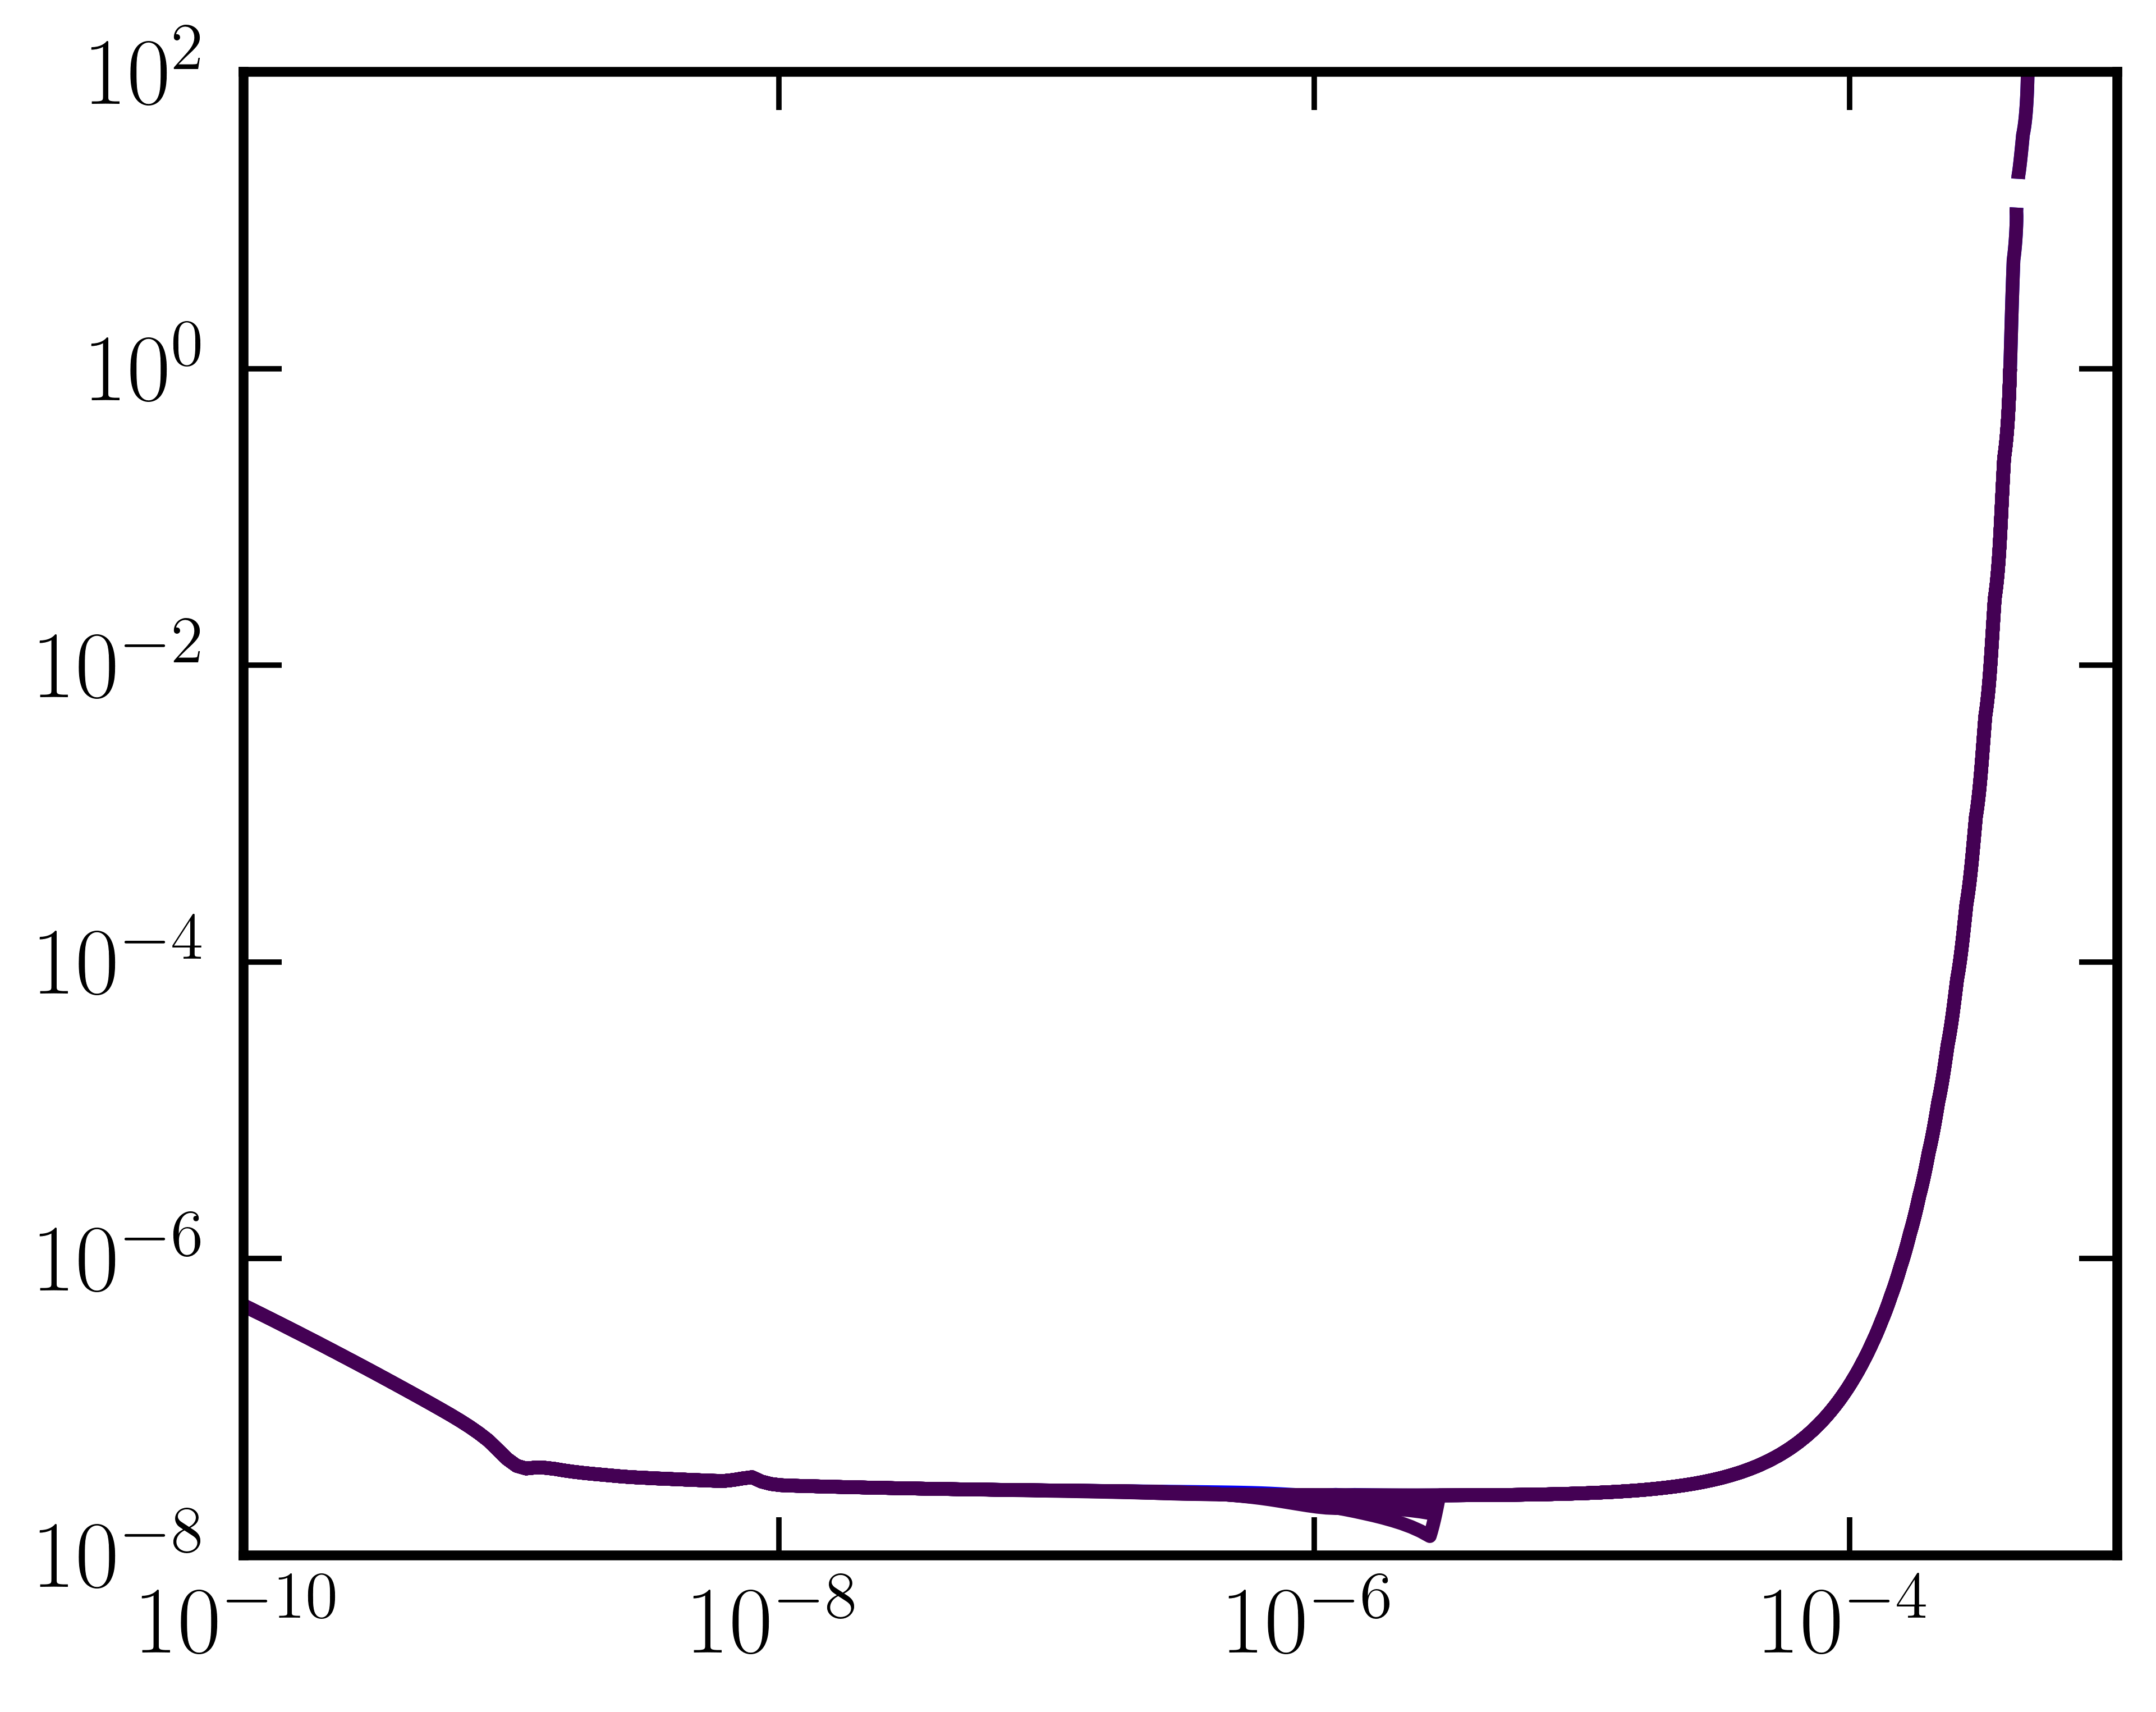

In [21]:
set_matplotlib_formats('retina')
plt.figure()

plt.xscale('log')
plt.yscale('log')


# Delta 95%CL, From PDG Statistics
# TS_choose = 5.99
TS_choose = 2.71

TS_Reg = 0.1


# --------------------------------------------------------------------------------
# (Approx: Ty = 1 - Tmu)
# DelI_tot = Tmu * DelI_M + (1 - Tmu) * (DelI_Y + DelI_Doppler)

# Fit with Chluba 15 (logx Integration/Power=-1)
X_plt_m1, Y_plt_m1 = np.meshgrid( mAp_1Dary_import_m1, eps_1Dary_import_m1    )
Z_plt_m1           = np.log10(    TS_2Dary_import_m1   + TS_Reg )

# z_trans = 5.8*10^4, Power = 1.88
X_plt_5p8e4_1p88, Y_plt_5p8e4_1p88 = np.meshgrid( mAp_1Dary_import_5p8e4_1p88, eps_1Dary_import_5p8e4_1p88    )
Z_plt_5p8e4_1p88                   = np.log10(    TS_2Dary_import_5p8e4_1p88   + TS_Reg )

# z_trans = 5.8*10^4, Power = 3
X_plt_5p8e4_3   , Y_plt_5p8e4_3    = np.meshgrid( mAp_1Dary_import_5p8e4_3   , eps_1Dary_import_5p8e4_3  )
Z_plt_5p8e4_3                      = np.log10(    TS_2Dary_import_5p8e4_3    + TS_Reg )

# z_trans = 5.8*10^4, Power = 5
X_plt_5p8e4_5   , Y_plt_5p8e4_5    = np.meshgrid( mAp_1Dary_import_5p8e4_5 , eps_1Dary_import_5p8e4_5  )
Z_plt_5p8e4_5                      = np.log10(    TS_2Dary_import_5p8e4_5    + TS_Reg )

# z_trans = 10^5, Power = 1.88
X_plt_10e4_1p88, Y_plt_10e4_1p88   = np.meshgrid( mAp_1Dary_import_10e4_1p88, eps_1Dary_import_10e4_1p88    )
Z_plt_10e4_1p88                    = np.log10(    TS_2Dary_import_10e4_1p88    + TS_Reg )

# z_trans = 10^5, Power = 3
X_plt_10e4_3   , Y_plt_10e4_3      = np.meshgrid( mAp_1Dary_import_10e4_3   , eps_1Dary_import_10e4_3    )
Z_plt_10e4_3                       = np.log10(    TS_2Dary_import_10e4_3    + TS_Reg )

# z_trans = 10^5, Power = 5
X_plt_10e4_5   , Y_plt_10e4_5      = np.meshgrid( mAp_1Dary_import_10e4_5   , eps_1Dary_import_10e4_5    )
Z_plt_10e4_5                       = np.log10(    TS_2Dary_import_10e4_5    + TS_Reg )

# z_trans = 1.4*10^5, Power = 1.88
X_plt_14e4_1p88, Y_plt_14e4_1p88   = np.meshgrid( mAp_1Dary_import_14e4_1p88, eps_1Dary_import_14e4_1p88    )
Z_plt_14e4_1p88                    = np.log10(    TS_2Dary_import_14e4_1p88    + TS_Reg )

# z_trans = 1.4*10^5, Power = 3
X_plt_14e4_3   , Y_plt_14e4_3      = np.meshgrid( mAp_1Dary_import_14e4_3   , eps_1Dary_import_14e4_3    )
Z_plt_14e4_3                       = np.log10(    TS_2Dary_import_14e4_3    + TS_Reg )

# z_trans = 1.4*10^5, Power = 5
X_plt_14e4_5   , Y_plt_14e4_5      = np.meshgrid( mAp_1Dary_import_14e4_5   , eps_1Dary_import_14e4_5    )
Z_plt_14e4_5                       = np.log10(    TS_2Dary_import_14e4_5    + TS_Reg )

# z_trans = 1.7*10^5, Power = 1.88
X_plt_17e4_1p88, Y_plt_17e4_1p88   = np.meshgrid( mAp_1Dary_import_17e4_1p88, eps_1Dary_import_17e4_1p88 )
Z_plt_17e4_1p88                    = np.log10(    TS_2Dary_import_17e4_1p88 + TS_Reg )

# z_trans = 1.7*10^5, Power = 3
X_plt_17e4_3   , Y_plt_17e4_3      = np.meshgrid( mAp_1Dary_import_17e4_3   , eps_1Dary_import_17e4_3    )
Z_plt_17e4_3                       = np.log10(    TS_2Dary_import_17e4_3    + TS_Reg )

# z_trans = 1.7*10^5, Power = 5
X_plt_17e4_5   , Y_plt_17e4_5      = np.meshgrid( mAp_1Dary_import_17e4_5   , eps_1Dary_import_17e4_5    )
Z_plt_17e4_5                       = np.log10(    TS_2Dary_import_17e4_5    + TS_Reg )



CS_trans_m1        =  plt.contour(X_plt_m1, Y_plt_m1, Z_plt_m1,  levels = [ np.log10(TS_choose) ], colors='blue')

CS_trans_5p8e4_1p88=  plt.contour(X_plt_5p8e4_1p88, Y_plt_5p8e4_1p88, Z_plt_5p8e4_1p88,  levels = [ np.log10(TS_choose) ])
CS_trans_5p8e4_3   =  plt.contour(X_plt_5p8e4_3   , Y_plt_5p8e4_3   , Z_plt_5p8e4_3   ,  levels = [ np.log10(TS_choose) ])
CS_trans_5p8e4_5   =  plt.contour(X_plt_5p8e4_5   , Y_plt_5p8e4_5   , Z_plt_5p8e4_5   ,  levels = [ np.log10(TS_choose) ])

CS_trans_10e4_1p88 =  plt.contour(X_plt_10e4_1p88 , Y_plt_10e4_1p88 , Z_plt_10e4_1p88 ,  levels = [ np.log10(TS_choose) ])
CS_trans_10e4_3    =  plt.contour(X_plt_10e4_3    , Y_plt_10e4_3    , Z_plt_10e4_3    ,  levels = [ np.log10(TS_choose) ])
CS_trans_10e4_5    =  plt.contour(X_plt_10e4_5    , Y_plt_10e4_5    , Z_plt_10e4_5    ,  levels = [ np.log10(TS_choose) ])

CS_trans_14e4_1p88 =  plt.contour(X_plt_14e4_1p88 , Y_plt_14e4_1p88 , Z_plt_14e4_1p88 ,  levels = [ np.log10(TS_choose) ])
CS_trans_14e4_3    =  plt.contour(X_plt_14e4_3    , Y_plt_14e4_3    , Z_plt_14e4_3    ,  levels = [ np.log10(TS_choose) ])
CS_trans_14e4_5    =  plt.contour(X_plt_14e4_5    , Y_plt_14e4_5    , Z_plt_14e4_5    ,  levels = [ np.log10(TS_choose) ])

CS_trans_17e4_1p88 =  plt.contour(X_plt_17e4_1p88 , Y_plt_17e4_1p88 , Z_plt_17e4_1p88 ,  levels = [ np.log10(TS_choose) ])
CS_trans_17e4_3    =  plt.contour(X_plt_17e4_3    , Y_plt_17e4_3    , Z_plt_17e4_3    ,  levels = [ np.log10(TS_choose) ])
CS_trans_17e4_5    =  plt.contour(X_plt_17e4_5    , Y_plt_17e4_5    , Z_plt_17e4_5    ,  levels = [ np.log10(TS_choose) ])

Our_Greens_trans_m1 = np.transpose(CS_trans_m1.collections[0].get_paths()[0].vertices )

Our_Greens_trans_5p8e4_1p88 = np.transpose(CS_trans_5p8e4_1p88.collections[0].get_paths()[0].vertices )
Our_Greens_trans_5p8e4_3    = np.transpose(CS_trans_5p8e4_3.collections[0].get_paths()[0].vertices )
Our_Greens_trans_5p8e4_5    = np.transpose(CS_trans_5p8e4_5.collections[0].get_paths()[0].vertices )

Our_Greens_trans_10e4_1p88  = np.transpose(CS_trans_10e4_1p88.collections[0].get_paths()[0].vertices )
Our_Greens_trans_10e4_3     = np.transpose(CS_trans_10e4_3.collections[0].get_paths()[0].vertices )
Our_Greens_trans_10e4_5     = np.transpose(CS_trans_10e4_5.collections[0].get_paths()[0].vertices )

Our_Greens_trans_14e4_1p88  = np.transpose(CS_trans_14e4_1p88.collections[0].get_paths()[0].vertices )
Our_Greens_trans_14e4_3     = np.transpose(CS_trans_14e4_3.collections[0].get_paths()[0].vertices )
Our_Greens_trans_14e4_5     = np.transpose(CS_trans_14e4_5.collections[0].get_paths()[0].vertices )

Our_Greens_trans_17e4_1p88  = np.transpose(CS_trans_17e4_1p88.collections[0].get_paths()[0].vertices )
Our_Greens_trans_17e4_3     = np.transpose(CS_trans_17e4_3.collections[0].get_paths()[0].vertices )
Our_Greens_trans_17e4_5     = np.transpose(CS_trans_17e4_5.collections[0].get_paths()[0].vertices )

NameError: name 'mAp_fidu_Lext' is not defined

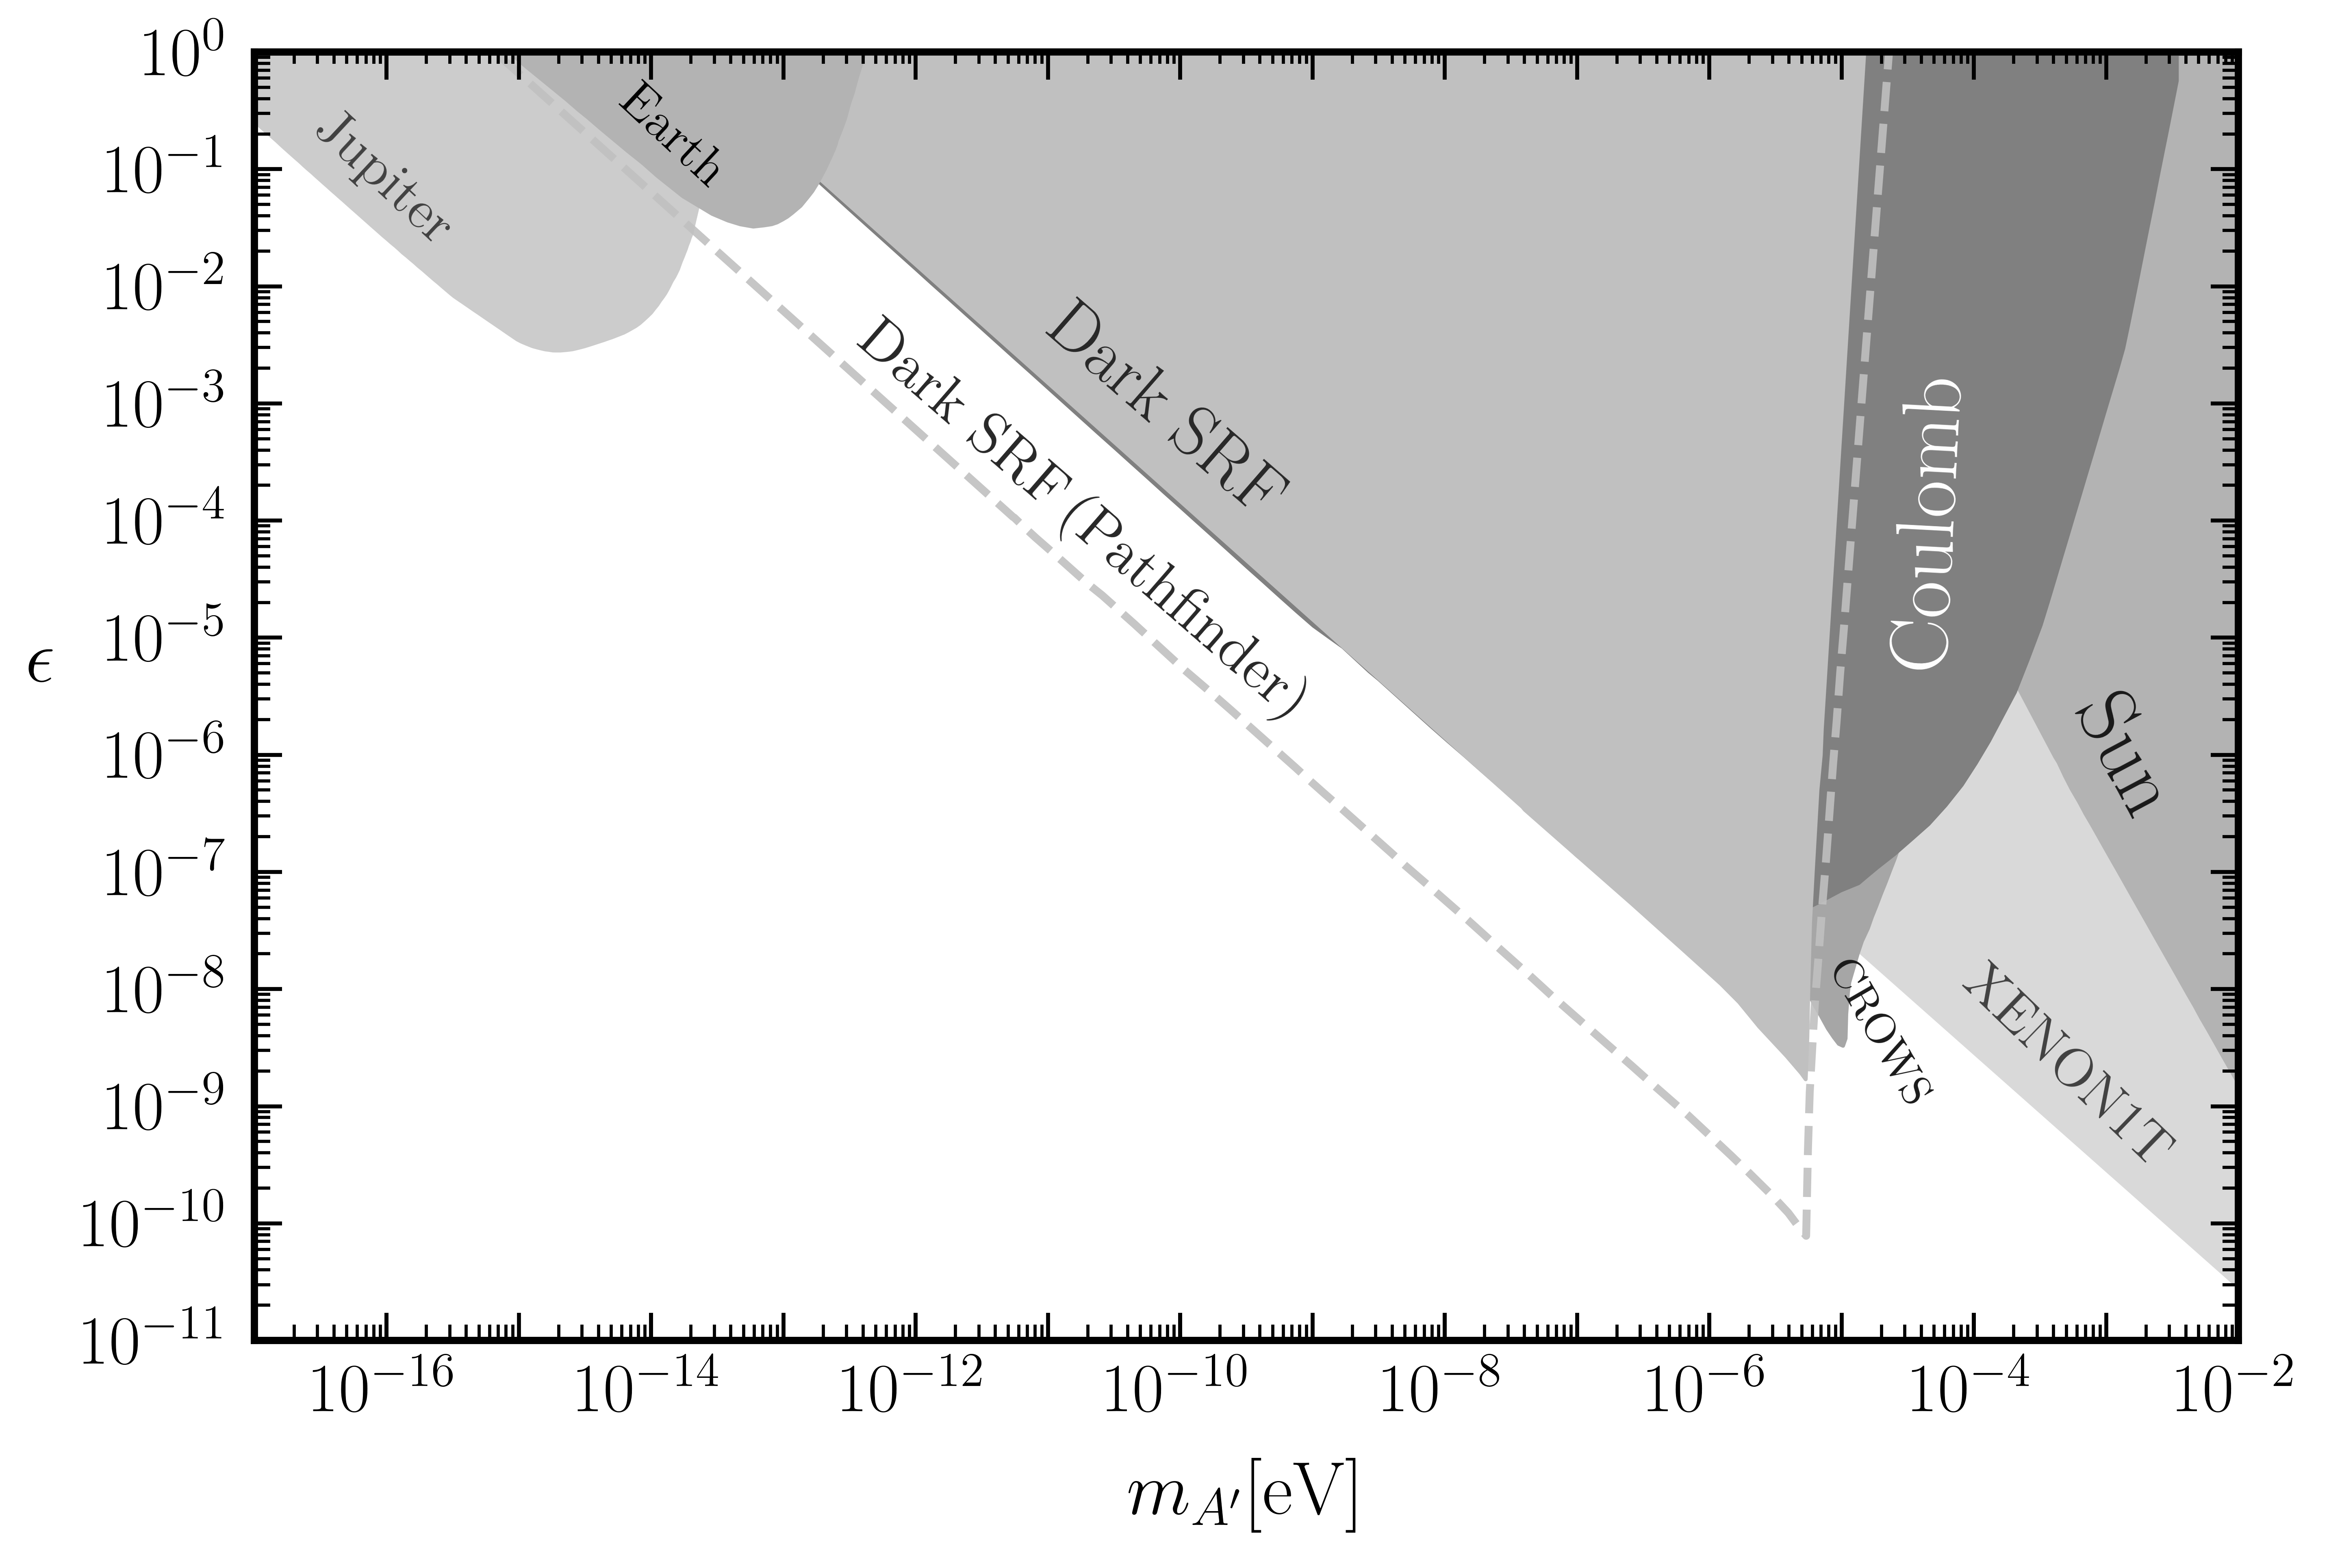

In [22]:
# ====================================================
# Plot Parameters
mAp_pltmin = 1e-17 # eV
mAp_pltmax = 1e-2  # eV

eps_pltmin = 1e-11
eps_pltmax = 1e0

majortick_len = 7 # length of major tick
minortick_len = 4 # length of minor tick

twin_majortick_len = majortick_len  # length of twin major tick
twin_minortick_len = minortick_len  # length of twin minor tick

# ====================================================
# color for different eras
color_free = 'purple'
color_y    = 'blue'
color_trans= 'green'
color_mu   = 'orange'
color_T    = 'red'
# ====================================================

set_matplotlib_formats('retina')

fig, ax = plt.subplots()

ax1 = ax.twiny()

fig.set_size_inches(9, 6)

ax.set_xscale('log')
ax.set_yscale('log')
ax1.set_xscale('log')    # twin_y axis
ax1.set_yscale('log')    # twin_y axis


ax.set_xlim(mAp_pltmin, mAp_pltmax)
ax.set_ylim(eps_pltmin, eps_pltmax)
ax1.set_xlim(mAp_pltmin, mAp_pltmax)    # twin_y axis
ax1.set_ylim(eps_pltmin, eps_pltmax)    # twin_y axis

# ======================================================================================

ax.xaxis.set_major_locator( mticker.LogLocator(numticks=999, base=100) )
ax.xaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))
ax.yaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax.yaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))


ax.tick_params(which='major', length=majortick_len, labelbottom=True)
ax.tick_params(which='minor', length=minortick_len, labelbottom=False)

ax.tick_params(axis='both', left=True, top=True, right=True, bottom=True, labelleft=True, labeltop=False, labelright=False, labelbottom=True)

plt.setp(ax.xaxis.get_ticklabels(), rotation=0)

ax.set_xlabel(r'$m_{A^\prime}$[eV]',fontsize=19)
ax.set_ylabel(r'$\epsilon$',fontsize=19, rotation=0)

ax1.xaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax1.xaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)) )

ax1.tick_params(which='major', length=twin_majortick_len)
ax1.tick_params(axis='both'  , left=False, top=True, right=False, bottom=True, labelleft=False, labeltop=False, labelright=False, labelbottom=False)


# ======================================================================================

color_XenonSolar       = lighten_color('gray', 0.3)
color_SolarLuminosity  = lighten_color('gray', 0.6)
color_Cavendish        = lighten_color('gray', 1)
color_CROW             = lighten_color('gray', 0.7)
color_DarkSRF          = lighten_color('gray', 0.5)
color_Jupyter          = lighten_color('gray', 0.4)
color_Earth            = lighten_color('gray', 0.6)


color_XenonSolar_label       = lighten_color('gray', 1.5)
color_SolarLuminosity_label  = lighten_color('black', 0.9)
color_Cavendish_label        = lighten_color('white', 1)
color_CROW_label             = lighten_color('gray', 1.8)
color_DarkSRF_label          = lighten_color('gray', 1.7)
color_Jupyter_label          = lighten_color('gray', 1.5)
color_Earth_label            = lighten_color('gray', 2)

# Xenon-1T Solar (2112.12116 XENON1T Solar DP)
ax.fill_between(  XenonSolar_2Dary_with_Lext[0], XenonSolar_2Dary_with_Lext[1], max(XenonSolar_2Dary_with_Lext[1]), color=color_XenonSolar, alpha=1, zorder=0)

# Solar Luminosity (2304.12907 Li&Xu)
ax.fill_between(  SolarLuminosity_2Dary_with_Lext[0], SolarLuminosity_2Dary_with_Lext[1], max(SolarLuminosity_2Dary_with_Lext[1]), color=color_SolarLuminosity, alpha=1, zorder=1)

# Cavendish-Coulomb
ax.fill_between(  Cavendish_2Dary[0], Cavendish_2Dary[1], max(Cavendish_2Dary[1]), color=color_Cavendish, alpha=1, zorder=3)

# CROWS
ax.fill_between(  CROWS_2Dary_with_Rext[0], CROWS_2Dary_with_Rext[1], max(CROWS_2Dary_with_Rext[1]), color=color_CROW, alpha=1)

# Dark SRF Exclusion (2301.11512 Romanenko etc)
ax.fill_between(  DarkSRF_2Dary_with_LRext[0], DarkSRF_2Dary_with_LRext[1], max(DarkSRF_2Dary_with_LRext[1]), color=color_DarkSRF, alpha=1, zorder=5)

# Dark SRF Pathfinder Projection (2203.12714 Snowmass)
ax.plot(          DarkSRF_Proj_2Dary_with_LRext[0], DarkSRF_Proj_2Dary_with_LRext[1], color=color_DarkSRF, linestyle = 'dashed', linewidth=2.0, zorder=10)

# Jupyter
ax.fill_between(  Jupiter_2Dary[0], Jupiter_2Dary[1], max(Jupiter_2Dary[1]), color=color_Jupyter, alpha=1, zorder=1)

# Earth
ax.fill_between(  Earth_2Dary[0]  , Earth_2Dary[1]  , max(Earth_2Dary[1])  , color=color_Earth  , alpha=1, zorder=7)


ax.text(7e-5    , 3e-10  , r'XENON1T'                , fontsize=14 , color=color_XenonSolar_label      , rotation=-44 , zorder=9)
ax.text(4.5e-4  , 3e-7   , r'Sun'                    , fontsize=21 , color=color_SolarLuminosity_label , rotation=-62 , zorder=9)
ax.text(2.3e-5  , 7e-6   , r'Coulomb'                , fontsize=21 , color=color_Cavendish_label       , rotation=87  , zorder=9)
ax.text(7e-6    , 1e-9   , r'CROWS'                   , fontsize=11 , color=color_CROW_label            , rotation=-60 , zorder=9)
ax.text(8e-12   , 1e-4   , r'Dark SRF'               , fontsize=18 , color=color_DarkSRF_label         , rotation=-41 , zorder=9)
ax.text(3e-13   , 2e-6   , r'Dark SRF\,(Pathfinder)' , fontsize=15 , color=color_DarkSRF_label         , rotation=-41 , zorder=9)
ax.text(2.5e-17 , 2.3e-2 , r'Jupiter'                , fontsize=14 , color=color_Jupyter_label         , rotation=-43 , zorder=9)
ax.text(5e-15   , 7e-2   , r'Earth'                  , fontsize=13 , color=color_Earth_label           , rotation=-43 , zorder=9)





# ======================================================================================
# COBE-FIRAS Plot Arrays: mAp and eps

# free streaming era
mAp_FIRAS_ary_free          = mAp_fidu_Lext[mAp_fidu_Lext<=mAp_trans_0]
eps_FIRAS_ary_free          = eps_fidu_Lext[mAp_fidu_Lext<=mAp_trans_0]

# y era
mAp_FIRAS_ary_y             = mAp_fidu_Lext[np.logical_and(mAp_fidu_Lext>mAp_trans_0,mAp_fidu_Lext<=mAp_trans_1)]
eps_FIRAS_ary_y             = eps_fidu_Lext[np.logical_and(mAp_fidu_Lext>mAp_trans_0,mAp_fidu_Lext<mAp_trans_1)]

# transition era (solid)
mAp_FIRAS_ary_trans_solid   = mAp_fidu_Lext[np.logical_and(mAp_fidu_Lext>mAp_trans_1,mAp_fidu_Lext<=mAp_trans_2)]
eps_FIRAS_ary_trans_solid   = eps_fidu_Lext[np.logical_and(mAp_fidu_Lext>mAp_trans_1,mAp_fidu_Lext<mAp_trans_2)]

# transition era (dotted)
mAp_FIRAS_ary_trans_dotted  = mAp_fidu_M
eps_FIRAS_ary_trans_dotted  = eps_fidu_M

# transition era (total)
mAp_FIRAS_ary_trans         = np.append(mAp_FIRAS_ary_trans_solid,mAp_FIRAS_ary_trans_dotted)
eps_FIRAS_ary_trans         = np.append(eps_FIRAS_ary_trans_solid,eps_FIRAS_ary_trans_dotted)

# mu era
mAp_FIRAS_ary_mu            = mAp_fidu_R[np.logical_and(mAp_fidu_R>=mAp_mid_dashed,mAp_fidu_R<mAp_dcs)]
eps_FIRAS_ary_mu            = eps_fidu_R[np.logical_and(mAp_fidu_R>=mAp_mid_dashed,mAp_fidu_R<mAp_dcs)]

# T era
mAp_FIRAS_ary_T             = mAp_fidu_R[mAp_fidu_R>=mAp_dcs]
eps_FIRAS_ary_T             = eps_fidu_R[mAp_fidu_R>=mAp_dcs]


# ======================================================================================

# COBE-FIRAS constraint: Line
linewidth_FIRAS_solid  = 2.35
linewidth_FIRAS_dotted = 2.65


ax.plot( mAp_FIRAS_ary_free        , eps_FIRAS_ary_free         , color=color_free ,  linewidth=linewidth_FIRAS_solid    , zorder=10 )
ax.plot( mAp_FIRAS_ary_y           , eps_FIRAS_ary_y            , color=color_y    ,  linewidth=linewidth_FIRAS_solid    , zorder=10)
ax.plot( mAp_FIRAS_ary_trans_solid , eps_FIRAS_ary_trans_solid  , color=color_trans,  linewidth=linewidth_FIRAS_solid    , zorder=10 )
ax.plot( mAp_FIRAS_ary_trans_dotted, eps_FIRAS_ary_trans_dotted , color=color_trans,  linewidth=linewidth_FIRAS_dotted   , zorder=10,       linestyle = 'dotted' )
ax.plot( mAp_FIRAS_ary_mu_dotted   , eps_FIRAS_ary_mu_dotted    , color=color_mu   ,  linewidth=linewidth_FIRAS_dotted   , zorder=10,       linestyle = 'dotted' )
ax.plot( mAp_FIRAS_ary_mu_solid    , eps_FIRAS_ary_mu_solid     , color=color_mu   ,  linewidth=linewidth_FIRAS_solid    , zorder=10 )
ax.plot( mAp_FIRAS_ary_T           , eps_FIRAS_ary_T            , color=color_T    ,  linewidth=linewidth_FIRAS_solid    , zorder=10 )




# COBE-FIRAS constraint: Shade
alpha_FIRAS = 0.17

ax.fill_between(  mAp_FIRAS_ary_free                                      , eps_FIRAS_ary_free                                      , max(np.ones(len(mAp_FIRAS_ary_free)))         ,linewidth=0.0 , color=color_free  , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_free[-1], mAp_FIRAS_ary_y    )  , np.append(eps_FIRAS_ary_free[-1], eps_FIRAS_ary_y    )  , max(np.ones(len(mAp_FIRAS_ary_y)+1))          ,linewidth=0.0 , color=color_y     , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_y[-1] , mAp_FIRAS_ary_trans)    , np.append(eps_FIRAS_ary_y[-1]   , eps_FIRAS_ary_trans)  , max(np.ones(len(mAp_FIRAS_ary_trans)+1))      ,linewidth=0.0 , color=color_trans , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_trans[-1], mAp_FIRAS_ary_mu)    , np.append(eps_FIRAS_ary_trans[-1], eps_FIRAS_ary_mu)    , max(np.ones(len(mAp_FIRAS_ary_mu)+1))         ,linewidth=0.0 , color=color_mu    , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_mu[-1], mAp_FIRAS_ary_T)        , np.append(eps_FIRAS_ary_mu[-1], eps_FIRAS_ary_T)        , max(np.ones(len(mAp_FIRAS_ary_T)+1))          ,linewidth=0.0 , color=color_T     , alpha=alpha_FIRAS, zorder=10)

color_m1='black' 

color_5p8e4_1p88 = lighten_color('gray', 0.5)
color_5p8e4_3    = lighten_color('gray', 0.8)
color_5p8e4_5    = lighten_color('gray', 1.2)

color_10e4_1p88  = lighten_color('brown', 0.3)
color_10e4_3     = lighten_color('brown', 1)
color_10e4_5     = lighten_color('brown', 1.5)

color_14e4_1p88  = lighten_color('magenta', 0.3)
color_14e4_3     = lighten_color('magenta', 1)
color_14e4_5     = lighten_color('magenta', 1.2)

color_17e4_1p88  = lighten_color('cyan', 0.3)
color_17e4_3     = lighten_color('cyan', 1)
color_17e4_5     = lighten_color('cyan', 1.2)

zorder_varyTmu = 8
# zorder_varyTmu = 11


ax.plot( Our_Greens_trans_5p8e4_1p88[0], Our_Greens_trans_5p8e4_1p88[1], label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (5.8 \times 10^4, 1.88)$', color=color_5p8e4_1p88,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_5p8e4_3[0]   , Our_Greens_trans_5p8e4_3[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (5.8 \times 10^4, 3)$'   , color=color_5p8e4_3   ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_5p8e4_5[0]   , Our_Greens_trans_5p8e4_5[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (5.8 \times 10^4, 5)$'   , color=color_5p8e4_5   ,  linewidth=2.0, zorder=zorder_varyTmu)

ax.plot( Our_Greens_trans_10e4_1p88[0] , Our_Greens_trans_10e4_1p88[1] , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (10^5, 1.88)$'           , color=color_10e4_1p88 ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_10e4_3[0]    , Our_Greens_trans_10e4_3[1]    , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (10^5, 3)$'              , color=color_10e4_3    ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_10e4_5[0]    , Our_Greens_trans_10e4_5[1]    , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (10^5, 5)$'              , color=color_10e4_5    ,  linewidth=2.0, zorder=zorder_varyTmu)

ax.plot( Our_Greens_trans_14e4_1p88[0] , Our_Greens_trans_14e4_1p88[1], label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.4 \times 10^5, 1.88)$' , color=color_14e4_1p88 ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_14e4_3[0]    , Our_Greens_trans_14e4_3[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.4 \times 10^5, 3)$'    , color=color_14e4_3    ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_14e4_5[0]    , Our_Greens_trans_14e4_5[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.4 \times 10^5, 5)$'    , color=color_14e4_5    ,  linewidth=2.0, zorder=zorder_varyTmu)

ax.plot( Our_Greens_trans_17e4_1p88[0] , Our_Greens_trans_17e4_1p88[1], label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.7 \times 10^5, 1.88)$' , color=color_17e4_1p88 ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_17e4_3[0]    , Our_Greens_trans_17e4_3[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.7 \times 10^5, 3)$'    , color=color_17e4_3    ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_17e4_5[0]    , Our_Greens_trans_17e4_5[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.7 \times 10^5, 5)$'    , color=color_17e4_5    ,  linewidth=2.0, zorder=zorder_varyTmu)

ax.plot( Our_Greens_trans_m1[0], Our_Greens_trans_m1[1], label = r'$\mathrm{Chluba15 Fit}$', color=color_m1,  linewidth=2.0, zorder=zorder_varyTmu)


# ======================================================================================
# Label of 'FIRAS'
fontsize_FIRAS = 19

ax.text(3e-17, 3e-8, "FIRAS: $95\%\,\mathrm{C.L.}$", color='black', zorder=10, fontsize=fontsize_FIRAS, fontweight='bold')
# ======================================================================================


ax.legend(ncol=2, bbox_to_anchor=(0.35, 0.16), loc = 'center',fontsize=9)

# fig.suptitle(r"\bf{Dark Photon Constraints: Different $T_\mu(z)$}", y=0.94, fontsize=18)
fig.suptitle(r"\bf{Dark Photon Constraints: Different $T_\mu(z';x')$}", y=0.94, fontsize=18)

# plt.savefig('mAp_eps_plt_varyTmu.pdf')
# plt.savefig('mAp_eps_plt_varyTmu.png', dpi=350)

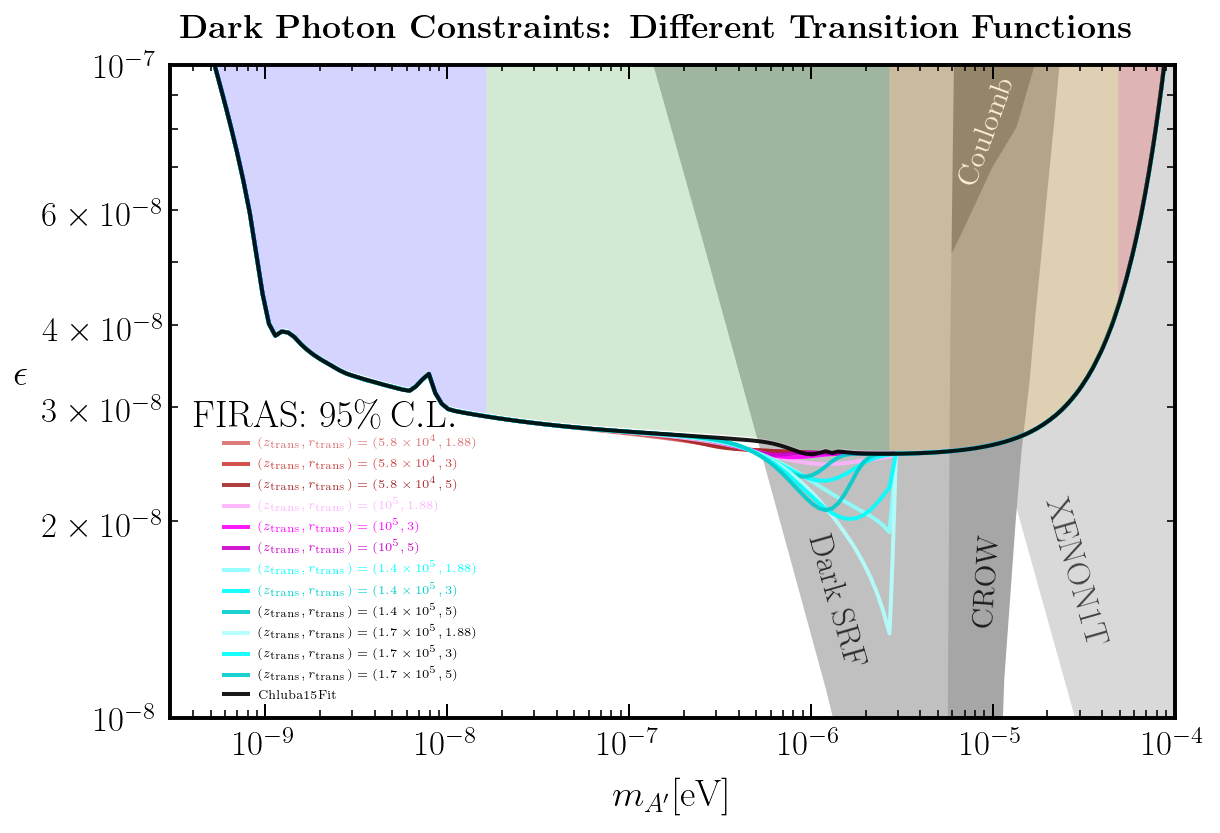

In [21]:


# ====================================================
# Plot Parameters
mAp_pltmin = 3e-10 # eV
mAp_pltmax = 1e-4  # eV

eps_pltmin = 1e-8
eps_pltmax = 1e-7

majortick_len = 7 # length of major tick
minortick_len = 4 # length of minor tick

twin_majortick_len = majortick_len  # length of twin major tick
twin_minortick_len = minortick_len  # length of twin minor tick
# ====================================================

fig, ax = plt.subplots()

ax1 = ax.twiny()

fig.set_size_inches(9, 6)

ax.set_xscale('log')
ax.set_yscale('log')
ax1.set_xscale('log')    # twin_y axis
ax1.set_yscale('log')    # twin_y axis

# ======================================================================================

ax.set_xlim(mAp_pltmin, mAp_pltmax)
ax.set_ylim(eps_pltmin, eps_pltmax)
ax1.set_xlim(mAp_pltmin, mAp_pltmax)    # twin_y axis
ax1.set_ylim(eps_pltmin, eps_pltmax)    # twin_y axis


ax.xaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax.xaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))
ax.yaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax.yaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))


ax.tick_params(which='major', length=majortick_len, labelbottom=True )
ax.tick_params(which='minor', length=minortick_len, labelbottom=False)

ax.tick_params(axis='both', left=True, top=True, right=True, bottom=True, labelleft=True, labeltop=False, labelright=False, labelbottom=True)

plt.setp(ax.xaxis.get_ticklabels(), rotation=0)

ax.set_xlabel(r'$m_{A^\prime}$[eV]',fontsize=19 )
ax.set_ylabel(r'$\epsilon$',fontsize=19, rotation=0)

ax1.xaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10)  )
ax1.xaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))

ax1.tick_params(which='major', length=twin_majortick_len)
ax1.tick_params(axis='both', left=False, top=True, right=False, bottom=True, labelleft=False, labeltop=False, labelright=False, labelbottom=False)


# ======================================================================================

color_XenonSolar_label       = lighten_color('gray', 1.5)
color_SolarLuminosity_label  = lighten_color('black', 0.9)
color_Cavendish_label        = lighten_color('white', 1)
color_CROW_label             = lighten_color('gray', 1.8)
color_DarkSRF_label          = lighten_color('gray', 1.7)
color_Jupiter_label          = lighten_color('gray', 1.5)
color_Earth_label            = lighten_color('gray', 2)

color_XenonSolar       = lighten_color('gray', 0.3)
color_SolarLuminosity  = lighten_color('gray', 0.6)
color_Cavendish        = lighten_color('gray', 1)
color_CROW             = lighten_color('gray', 0.7)
color_DarkSRF          = lighten_color('gray', 0.5)
color_Jupiter          = lighten_color('gray', 0.4)
color_Earth            = lighten_color('gray', 0.6)


#Xenon-1T Solar (2112.12116 XENON1T Solar DP)
ax.fill_between(  XenonSolar_2Dary [0], XenonSolar_2Dary [1], max(XenonSolar_2Dary [1]), color=color_XenonSolar, alpha=1, zorder=-2)


# Cavendish-Coulomb

#without interpolation, raw data
ax.fill_between(  Cavendish_2Dary[0], Cavendish_2Dary[1], max(Cavendish_2Dary[1]), color=color_Cavendish, alpha=1, zorder=0)


#CROWS
ax.fill_between(  CROWS_2Dary[0], CROWS_2Dary[1], max(CROWS_2Dary[1]), color=color_CROW, alpha=1, zorder=-1)


#Dark SRF PathFinder (2301.11512 Romanenko etc)
ax.fill_between(  DarkSRF_2Dary[0], DarkSRF_2Dary[1], max(DarkSRF_2Dary[1]), color=color_DarkSRF, alpha=1, zorder=1)



ax.text(1.8e-5 , 1.3e-8, r'XENON1T'          ,  fontweight='bold', fontsize=17, color=color_XenonSolar_label      , rotation=-74, zorder=3)
ax.text(6.24e-6 , 6.6e-8 , r'Coulomb',  fontweight='bold', fontsize=15, color=color_Cavendish_label       , rotation=70, zorder=3)
ax.text(7.6e-6 , 1.4e-8 , r'CROW'             ,  fontweight='bold', fontsize=15, color=color_CROW_label            , rotation=86, zorder=3)
ax.text(9e-7 , 1.2e-8, r'Dark SRF'          ,  fontweight='bold', fontsize=17, color=color_DarkSRF_label         , rotation=-74, zorder=3)

# ======================================================================================

# COBE-FIRAS constraint: Line
linewidth_FIRAS_solid  = 2.35
linewidth_FIRAS_dotted = 2.65


# ax.plot( mAp_FIRAS_ary_free        , eps_FIRAS_ary_free         , color=color_free ,  linewidth=linewidth_FIRAS_solid    , zorder=10  )
# ax.plot( mAp_FIRAS_ary_y           , eps_FIRAS_ary_y            , color=color_y    ,  linewidth=linewidth_FIRAS_solid    , zorder=10  )
# ax.plot( mAp_FIRAS_ary_trans_solid , eps_FIRAS_ary_trans_solid  , color=color_trans,  linewidth=linewidth_FIRAS_solid    , zorder=10  )
# ax.plot( mAp_FIRAS_ary_trans_dotted, eps_FIRAS_ary_trans_dotted , color=color_trans,  linewidth=linewidth_FIRAS_dotted   , zorder=10, linestyle = 'dotted'  )
# ax.plot( mAp_FIRAS_ary_mu_dotted   , eps_FIRAS_ary_mu_dotted    , color=color_mu   ,  linewidth=linewidth_FIRAS_dotted   , zorder=10, linestyle = 'dotted'  )
# ax.plot( mAp_FIRAS_ary_mu_solid    , eps_FIRAS_ary_mu_solid     , color=color_mu   ,  linewidth=linewidth_FIRAS_solid    , zorder=10  )
# ax.plot( mAp_FIRAS_ary_T           , eps_FIRAS_ary_T            , color=color_T    ,  linewidth=linewidth_FIRAS_solid    , zorder=10  )


# COBE-FIRAS constraint: Shade
alpha_FIRAS = 0.17

ax.fill_between(  np.append(mAp_FIRAS_ary_free[-1], mAp_FIRAS_ary_y    )  , np.append(eps_FIRAS_ary_free[-1], eps_FIRAS_ary_y    )  , max(np.ones(len(mAp_FIRAS_ary_y)+1))          ,linewidth=0.0 , color=color_y     , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_y[-1] , mAp_FIRAS_ary_trans)    , np.append(eps_FIRAS_ary_y[-1]   , eps_FIRAS_ary_trans)  , max(np.ones(len(mAp_FIRAS_ary_trans)+1))      ,linewidth=0.0 , color=color_trans , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_trans[-1], mAp_FIRAS_ary_mu)    , np.append(eps_FIRAS_ary_trans[-1], eps_FIRAS_ary_mu)    , max(np.ones(len(mAp_FIRAS_ary_mu)+1))         ,linewidth=0.0 , color=color_mu    , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_mu[-1], mAp_FIRAS_ary_T)        , np.append(eps_FIRAS_ary_mu[-1], eps_FIRAS_ary_T)        , max(np.ones(len(mAp_FIRAS_ary_T)+1))          ,linewidth=0.0 , color=color_T     , alpha=alpha_FIRAS, zorder=10)


color_m1='black' 

# color_5p8e4_1p88 = lighten_color('gray', 0.5)
# color_5p8e4_3    = lighten_color('gray', 0.8)
# color_5p8e4_5    = lighten_color('gray', 1.)

# color_10e4_1p88  = lighten_color('brown', 0.3)
# color_10e4_3     = lighten_color('brown', 0.8)
# color_10e4_5     = lighten_color('brown', 1.1)

# color_14e4_1p88  = lighten_color('magenta', 0.3)
# color_14e4_3     = lighten_color('magenta', 1)
# color_14e4_5     = lighten_color('magenta', 1.2)

# color_17e4_1p88  = lighten_color('cyan', 0.3)
# color_17e4_3     = lighten_color('cyan', 1)
# color_17e4_5     = lighten_color('cyan', 1.2)


color_5p8e4_1p88 = lighten_color('brown', 0.6)
color_5p8e4_3    = lighten_color('brown', 0.8)
color_5p8e4_5    = lighten_color('brown', 1.)

color_10e4_1p88  = lighten_color('magenta', 0.3)
color_10e4_3     = lighten_color('magenta', 1)
color_10e4_5     = lighten_color('magenta', 1.2)

color_14e4_1p88  = lighten_color('cyan', 0.45)
color_14e4_3     = lighten_color('cyan', 1)
color_14e4_5     = lighten_color('cyan', 1.2)


zorder_varyTmu = 7
# zorder_varyTmu = 11

linewidth_plt = 2

ax.plot( Our_Greens_trans_5p8e4_1p88[0], Our_Greens_trans_5p8e4_1p88[1], label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (5.8 \times 10^4, 1.88)$', color=color_5p8e4_1p88,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_5p8e4_3[0]   , Our_Greens_trans_5p8e4_3[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (5.8 \times 10^4, 3)$'   , color=color_5p8e4_3   ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_5p8e4_5[0]   , Our_Greens_trans_5p8e4_5[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (5.8 \times 10^4, 5)$'   , color=color_5p8e4_5   ,  linewidth=2.0, zorder=zorder_varyTmu)

ax.plot( Our_Greens_trans_10e4_1p88[0] , Our_Greens_trans_10e4_1p88[1] , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (10^5, 1.88)$'           , color=color_10e4_1p88 ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_10e4_3[0]    , Our_Greens_trans_10e4_3[1]    , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (10^5, 3)$'              , color=color_10e4_3    ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_10e4_5[0]    , Our_Greens_trans_10e4_5[1]    , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (10^5, 5)$'              , color=color_10e4_5    ,  linewidth=2.0, zorder=zorder_varyTmu)

ax.plot( Our_Greens_trans_14e4_1p88[0] , Our_Greens_trans_14e4_1p88[1], label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.4 \times 10^5, 1.88)$' , color=color_14e4_1p88 ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_14e4_3[0]    , Our_Greens_trans_14e4_3[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.4 \times 10^5, 3)$'    , color=color_14e4_3    ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_14e4_5[0]    , Our_Greens_trans_14e4_5[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.4 \times 10^5, 5)$'    , color=color_14e4_5    ,  linewidth=2.0, zorder=zorder_varyTmu)

ax.plot( Our_Greens_trans_17e4_1p88[0] , Our_Greens_trans_17e4_1p88[1], label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.7 \times 10^5, 1.88)$' , color=color_17e4_1p88 ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_17e4_3[0]    , Our_Greens_trans_17e4_3[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.7 \times 10^5, 3)$'    , color=color_17e4_3    ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_17e4_5[0]    , Our_Greens_trans_17e4_5[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.7 \times 10^5, 5)$'    , color=color_17e4_5    ,  linewidth=2.0, zorder=zorder_varyTmu)

ax.plot( Our_Greens_trans_m1[0], Our_Greens_trans_m1[1], label = r'$\mathrm{Chluba15 Fit}$', color=color_m1,  linewidth=2.0, zorder=zorder_varyTmu)


ax.text(4e-10, 2.8e-8, "FIRAS: $95\%\,\mathrm{C.L.}$", fontsize=fontsize_FIRAS, color='black', zorder=9,  fontweight='bold')


# color_Era_ary = [color_5p8e4_1p88, color_5p8e4_3, color_5p8e4_5,
#                  color_10e4_1p88 , color_10e4_3 , color_10e4_5 ,
#                  color_14e4_1p88 , color_14e4_3 , color_14e4_5 , 
#                  color_17e4_1p88 , color_17e4_3 , color_17e4_5 , color_m1 ]

color_Era_ary = [color_5p8e4_1p88, color_5p8e4_3, color_5p8e4_5,
                 color_10e4_1p88 , color_10e4_3 , color_10e4_5 ,
                                   color_14e4_3 , color_14e4_5 , 
                 color_m1 ]

leg = ax.legend(ncol=1, loc='center', bbox_to_anchor=(0.18, 0.23), fontsize=6)

for color,text in zip(color_Era_ary,leg.get_texts()):
    text.set_color(color)

# fig.suptitle(r"\bf{Dark Photon Constraints: Different $T_\mu(z)$}", y=0.94, fontsize=18)
fig.suptitle(r"\bf{Dark Photon Constraints: Different Transition Functions}", y=0.94, fontsize=17)

plt.savefig('../plots/mAp_eps_plt_varyTmu_zoomin.pdf')
plt.savefig('../plots/mAp_eps_plt_varyTmu_zoomin.png', dpi=350)

Text(0.5, 0.94, '\\bf{Dark Photon Constraints: Different $T_\\mu(z)$}')

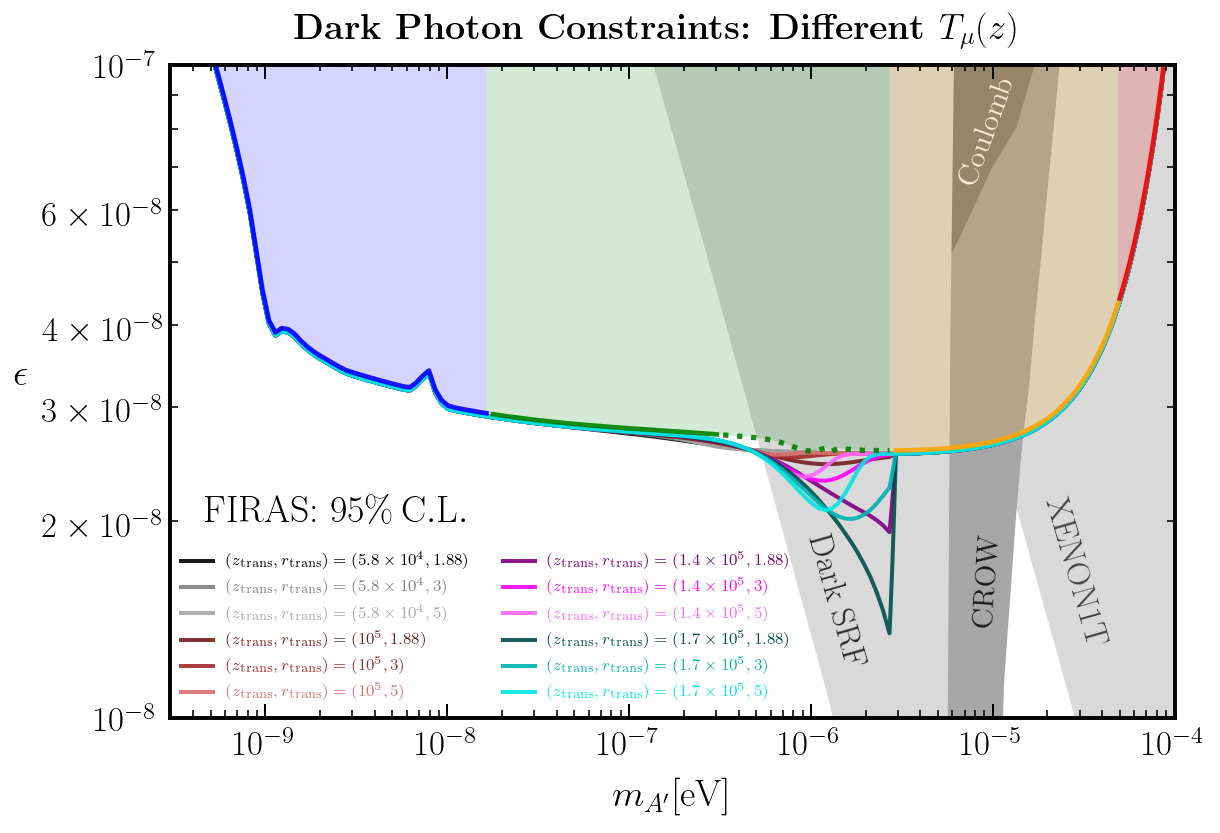

In [22]:


# ====================================================
# Plot Parameters
mAp_pltmin = 3e-10 # eV
mAp_pltmax = 1e-4  # eV

eps_pltmin = 1e-8
eps_pltmax = 1e-7

majortick_len = 7 # length of major tick
minortick_len = 4 # length of minor tick

twin_majortick_len = majortick_len  # length of twin major tick
twin_minortick_len = minortick_len  # length of twin minor tick
# ====================================================

fig, ax = plt.subplots()

ax1 = ax.twiny()

fig.set_size_inches(9, 6)

ax.set_xscale('log')
ax.set_yscale('log')
ax1.set_xscale('log')    # twin_y axis
ax1.set_yscale('log')    # twin_y axis

# ======================================================================================

ax.set_xlim(mAp_pltmin, mAp_pltmax)
ax.set_ylim(eps_pltmin, eps_pltmax)
ax1.set_xlim(mAp_pltmin, mAp_pltmax)    # twin_y axis
ax1.set_ylim(eps_pltmin, eps_pltmax)    # twin_y axis


ax.xaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax.xaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))
ax.yaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax.yaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))


ax.tick_params(which='major', length=majortick_len, labelbottom=True )
ax.tick_params(which='minor', length=minortick_len, labelbottom=False)

ax.tick_params(axis='both', left=True, top=True, right=True, bottom=True, labelleft=True, labeltop=False, labelright=False, labelbottom=True)

plt.setp(ax.xaxis.get_ticklabels(), rotation=0)

ax.set_xlabel(r'$m_{A^\prime}$[eV]',fontsize=19 )
ax.set_ylabel(r'$\epsilon$',fontsize=19, rotation=0)

ax1.xaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10)  )
ax1.xaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))

ax1.tick_params(which='major', length=twin_majortick_len)
ax1.tick_params(axis='both', left=False, top=True, right=False, bottom=True, labelleft=False, labeltop=False, labelright=False, labelbottom=False)


# ======================================================================================

color_XenonSolar_label       = lighten_color('gray', 1.5)
color_SolarLuminosity_label  = lighten_color('black', 0.9)
color_Cavendish_label        = lighten_color('white', 1)
color_CROW_label             = lighten_color('gray', 1.8)
color_DarkSRF_label          = lighten_color('gray', 1.7)
color_Jupiter_label          = lighten_color('gray', 1.5)
color_Earth_label            = lighten_color('gray', 2)

color_XenonSolar       = lighten_color('gray', 0.3)
color_SolarLuminosity  = lighten_color('gray', 0.6)
color_Cavendish        = lighten_color('gray', 1)
color_CROW             = lighten_color('gray', 0.7)
color_DarkSRF          = lighten_color('gray', 0.3)
color_Jupiter          = lighten_color('gray', 0.4)
color_Earth            = lighten_color('gray', 0.6)


#Xenon-1T Solar (2112.12116 XENON1T Solar DP)
ax.fill_between(  XenonSolar_2Dary [0], XenonSolar_2Dary [1], max(XenonSolar_2Dary [1]), color=color_XenonSolar, alpha=1, zorder=-2)


# Cavendish-Coulomb

#without interpolation, raw data
ax.fill_between(  Cavendish_2Dary[0], Cavendish_2Dary[1], max(Cavendish_2Dary[1]), color=color_Cavendish, alpha=1, zorder=0)


#CROWS
ax.fill_between(  CROWS_2Dary[0], CROWS_2Dary[1], max(CROWS_2Dary[1]), color=color_CROW, alpha=1, zorder=-1)


#Dark SRF PathFinder (2301.11512 Romanenko etc)
ax.fill_between(  DarkSRF_2Dary[0], DarkSRF_2Dary[1], max(DarkSRF_2Dary[1]), color=color_DarkSRF, alpha=1, zorder=1)



ax.text(1.8e-5 , 1.3e-8, r'XENON1T'          ,  fontweight='bold', fontsize=17, color=color_XenonSolar_label      , rotation=-74, zorder=3)
ax.text(6.24e-6 , 6.6e-8 , r'Coulomb',  fontweight='bold', fontsize=15, color=color_Cavendish_label       , rotation=70, zorder=3)
ax.text(7.6e-6 , 1.4e-8 , r'CROW'             ,  fontweight='bold', fontsize=15, color=color_CROW_label            , rotation=86, zorder=3)
ax.text(9e-7 , 1.2e-8, r'Dark SRF'          ,  fontweight='bold', fontsize=17, color=color_DarkSRF_label         , rotation=-74, zorder=3)

# ======================================================================================

# COBE-FIRAS constraint: Line
linewidth_FIRAS_solid  = 2.35
linewidth_FIRAS_dotted = 2.65


ax.plot( mAp_FIRAS_ary_free        , eps_FIRAS_ary_free         , color=color_free ,  linewidth=linewidth_FIRAS_solid    , zorder=10  )
ax.plot( mAp_FIRAS_ary_y           , eps_FIRAS_ary_y            , color=color_y    ,  linewidth=linewidth_FIRAS_solid    , zorder=10  )
ax.plot( mAp_FIRAS_ary_trans_solid , eps_FIRAS_ary_trans_solid  , color=color_trans,  linewidth=linewidth_FIRAS_solid    , zorder=10  )
ax.plot( mAp_FIRAS_ary_trans_dotted, eps_FIRAS_ary_trans_dotted , color=color_trans,  linewidth=linewidth_FIRAS_dotted   , zorder=10, linestyle = 'dotted'  )
ax.plot( mAp_FIRAS_ary_mu_dotted   , eps_FIRAS_ary_mu_dotted    , color=color_mu   ,  linewidth=linewidth_FIRAS_dotted   , zorder=10, linestyle = 'dotted'  )
ax.plot( mAp_FIRAS_ary_mu_solid    , eps_FIRAS_ary_mu_solid     , color=color_mu   ,  linewidth=linewidth_FIRAS_solid    , zorder=10  )
ax.plot( mAp_FIRAS_ary_T           , eps_FIRAS_ary_T            , color=color_T    ,  linewidth=linewidth_FIRAS_solid    , zorder=10  )


# COBE-FIRAS constraint: Shade
alpha_FIRAS = 0.17

ax.fill_between(  np.append(mAp_FIRAS_ary_free[-1], mAp_FIRAS_ary_y    )  , np.append(eps_FIRAS_ary_free[-1], eps_FIRAS_ary_y    )  , max(np.ones(len(mAp_FIRAS_ary_y)+1))          ,linewidth=0.0 , color=color_y     , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_y[-1] , mAp_FIRAS_ary_trans)    , np.append(eps_FIRAS_ary_y[-1]   , eps_FIRAS_ary_trans)  , max(np.ones(len(mAp_FIRAS_ary_trans)+1))      ,linewidth=0.0 , color=color_trans , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_trans[-1], mAp_FIRAS_ary_mu)    , np.append(eps_FIRAS_ary_trans[-1], eps_FIRAS_ary_mu)    , max(np.ones(len(mAp_FIRAS_ary_mu)+1))         ,linewidth=0.0 , color=color_mu    , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_mu[-1], mAp_FIRAS_ary_T)        , np.append(eps_FIRAS_ary_mu[-1], eps_FIRAS_ary_T)        , max(np.ones(len(mAp_FIRAS_ary_T)+1))          ,linewidth=0.0 , color=color_T     , alpha=alpha_FIRAS, zorder=10)


color_5p8e4_1p88 = lighten_color('gray', 2)
color_5p8e4_3    = lighten_color('gray', 1)
color_5p8e4_5    = lighten_color('gray', 0.7)

color_10e4_1p88  = lighten_color('brown', 1.2)
color_10e4_3     = lighten_color('brown', 1)
color_10e4_5     = lighten_color('brown', 0.6)

color_14e4_1p88  = lighten_color('magenta', 1.5)
color_14e4_3     = lighten_color('magenta', 1)
color_14e4_5     = lighten_color('magenta', 0.6)

color_17e4_1p88  = lighten_color('cyan', 1.7)
color_17e4_3     = lighten_color('cyan', 1.3)
color_17e4_5     = lighten_color('cyan', 1.1)

zorder_varyTmu = 7
# zorder_varyTmu = 11

ax.plot( Our_Greens_trans_5p8e4_1p88[0], Our_Greens_trans_5p8e4_1p88[1], label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (5.8 \times 10^4, 1.88)$', color=color_5p8e4_1p88,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_5p8e4_3[0]   , Our_Greens_trans_5p8e4_3[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (5.8 \times 10^4, 3)$'   , color=color_5p8e4_3   ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_5p8e4_5[0]   , Our_Greens_trans_5p8e4_5[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (5.8 \times 10^4, 5)$'   , color=color_5p8e4_5   ,  linewidth=2.0, zorder=zorder_varyTmu)

ax.plot( Our_Greens_trans_10e4_1p88[0] , Our_Greens_trans_10e4_1p88[1] , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (10^5, 1.88)$'           , color=color_10e4_1p88 ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_10e4_3[0]    , Our_Greens_trans_10e4_3[1]    , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (10^5, 3)$'              , color=color_10e4_3    ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_10e4_5[0]    , Our_Greens_trans_10e4_5[1]    , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (10^5, 5)$'              , color=color_10e4_5    ,  linewidth=2.0, zorder=zorder_varyTmu)

ax.plot( Our_Greens_trans_14e4_1p88[0] , Our_Greens_trans_14e4_1p88[1], label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.4 \times 10^5, 1.88)$' , color=color_14e4_1p88 ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_14e4_3[0]    , Our_Greens_trans_14e4_3[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.4 \times 10^5, 3)$'    , color=color_14e4_3    ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_14e4_5[0]    , Our_Greens_trans_14e4_5[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.4 \times 10^5, 5)$'    , color=color_14e4_5    ,  linewidth=2.0, zorder=zorder_varyTmu)

ax.plot( Our_Greens_trans_17e4_1p88[0] , Our_Greens_trans_17e4_1p88[1], label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.7 \times 10^5, 1.88)$' , color=color_17e4_1p88 ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_17e4_3[0]    , Our_Greens_trans_17e4_3[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.7 \times 10^5, 3)$'    , color=color_17e4_3    ,  linewidth=2.0, zorder=zorder_varyTmu)
ax.plot( Our_Greens_trans_17e4_5[0]    , Our_Greens_trans_17e4_5[1]   , label = r'$(z_\mathrm{trans},r_\mathrm{trans}) = (1.7 \times 10^5, 5)$'    , color=color_17e4_5    ,  linewidth=2.0, zorder=zorder_varyTmu)


ax.text(4.58e-10, 2e-8, "FIRAS: $95\%\,\mathrm{C.L.}$", fontsize=fontsize_FIRAS, color='black', zorder=9,  fontweight='bold')


color_Era_ary = [color_5p8e4_1p88, color_5p8e4_3, color_5p8e4_5,
                 color_10e4_1p88 , color_10e4_3 , color_10e4_5 ,
                 color_14e4_1p88 , color_14e4_3 , color_14e4_5 , 
                 color_17e4_1p88 , color_17e4_3 , color_17e4_5 ]

leg = ax.legend(ncol=2, loc='center', bbox_to_anchor=(0.315, 0.14), fontsize=8)

for color,text in zip(color_Era_ary,leg.get_texts()):
    text.set_color(color)

fig.suptitle(r"\bf{Dark Photon Constraints: Different $T_\mu(z)$}", y=0.94, fontsize=18)

# plt.savefig('mAp_eps_plt_varyTmu_zoomin.pdf')
# plt.savefig('mAp_eps_plt_varyTmu_zoomin.png', dpi=350)

Text(0.5, 0.94, '\\bf{Comparison of Dark Photon Constraints}')

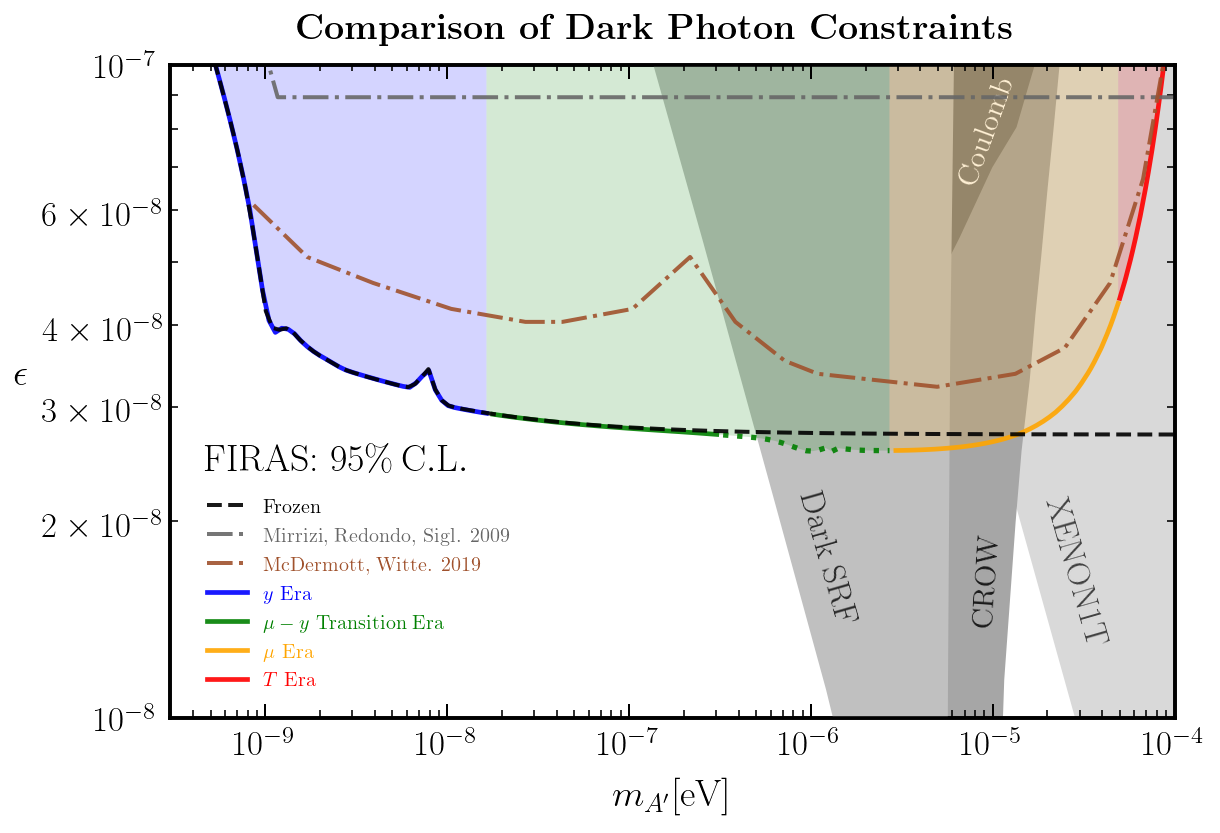

In [14]:
# ====================================================
# Plot Parameters
mAp_pltmin = 3e-10 # eV
mAp_pltmax = 1e-4  # eV

eps_pltmin = 1e-8
eps_pltmax = 1e-7

majortick_len = 7 # length of major tick
minortick_len = 4 # length of minor tick

twin_majortick_len = majortick_len  # length of twin major tick
twin_minortick_len = minortick_len  # length of twin minor tick
# ====================================================

fig, ax = plt.subplots()

ax1 = ax.twiny()

fig.set_size_inches(9, 6)

ax.set_xscale('log')
ax.set_yscale('log')
ax1.set_xscale('log')    # twin_y axis
ax1.set_yscale('log')    # twin_y axis

# ======================================================================================

ax.set_xlim(mAp_pltmin, mAp_pltmax)
ax.set_ylim(eps_pltmin, eps_pltmax)
ax1.set_xlim(mAp_pltmin, mAp_pltmax)    # twin_y axis
ax1.set_ylim(eps_pltmin, eps_pltmax)    # twin_y axis


ax.xaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax.xaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))
ax.yaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax.yaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))


ax.tick_params(which='major', length=majortick_len, labelbottom=True)
ax.tick_params(which='minor', length=minortick_len, labelbottom=False)

ax.tick_params(axis='both', left=True, top=True, right=True, bottom=True, labelleft=True, labeltop=False, labelright=False, labelbottom=True)

plt.setp(ax.xaxis.get_ticklabels(), rotation=0)

ax.set_xlabel(r'$m_{A^\prime}$[eV]',fontsize=19)
ax.set_ylabel(r'$\epsilon$',fontsize=19, rotation=0)

ax1.xaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax1.xaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))

ax1.tick_params(which='major', length=twin_majortick_len)
ax1.tick_params(axis='both', left=False, top=True, right=False, bottom=True, labelleft=False, labeltop=False, labelright=False, labelbottom=False)

# ======================================================================================

color_XenonSolar_label       = lighten_color('gray', 1.5)
color_SolarLuminosity_label  = lighten_color('black', 0.9)
color_Cavendish_label        = lighten_color('white', 1)
color_CROW_label             = lighten_color('gray', 1.8)
color_DarkSRF_label          = lighten_color('gray', 1.7)
color_Jupiter_label          = lighten_color('gray', 1.5)
color_Earth_label            = lighten_color('gray', 2)
color_Redondo          = lighten_color('gray', 1.2)
color_Samuel           = 'sienna'
color_XenonSolar       = lighten_color('gray', 0.3)
color_SolarLuminosity  = lighten_color('gray', 0.6)
color_Cavendish        = lighten_color('gray', 1)
color_CROW             = lighten_color('gray', 0.7)
color_DarkSRF          = lighten_color('gray', 0.5)
color_Jupiter          = lighten_color('gray', 0.4)
color_Earth            = lighten_color('gray', 0.6)


#Xenon-1T Solar (2112.12116 XENON1T Solar DP)
ax.fill_between(  XenonSolar_2Dary [0], XenonSolar_2Dary [1], max(XenonSolar_2Dary [1]), color=color_XenonSolar, alpha=1, zorder=0)


# Cavendish-Coulomb

#without interpolation, raw data
ax.fill_between(  Cavendish_2Dary[0], Cavendish_2Dary[1], max(Cavendish_2Dary[1]), color=color_Cavendish, alpha=1, zorder=2)


#CROWS
ax.fill_between(  CROWS_2Dary[0], CROWS_2Dary[1], max(CROWS_2Dary[1]), color=color_CROW, alpha=1, zorder=1)


#Dark SRF PathFinder (2301.11512 Romanenko etc)
ax.fill_between(  DarkSRF_2Dary[0], DarkSRF_2Dary[1], max(DarkSRF_2Dary[1]), color=color_DarkSRF, alpha=1, zorder=3)

# ======================================================================================
# free-streaming
# mAp_cuttoff=4.9e-5;
mAp_cuttoff=m_Aprime_res_RAD(z_dcs);
color_freestream_calc = 'black'
ax.plot( frozen_FIRAS_2Dary[0] , frozen_FIRAS_2Dary[1], label = r'Frozen', color = color_freestream_calc, linestyle = 'dashed', linewidth=2.0, zorder=11)

# Redondo et al 2009
ax.plot( Mirizzi_09_FIRAS_extended_2Dary[0], Mirizzi_09_FIRAS_extended_2Dary[1], label = r'Mirrizi, Redondo, Sigl. 2009', color = color_Redondo, linestyle = 'dashdot', linewidth=2, zorder=11)

# Pure Energy Injection
# ax.plot( mAp_list_FIRAS_PureInj   , eps_list_FIRAS_PureInj, linewidth=2, label = r'Pure Energy + $|\mu|$,$|y|$ Recast', color = color_Samuel, linestyle = 'dashed', zorder=12)


# McDermott and Witte
ax.plot( McDermott_Witte_19_FIRAS_2Dary[0]   , McDermott_Witte_19_FIRAS_2Dary[1], linewidth=2, label = r'McDermott, Witte. 2019', color = color_Samuel, linestyle = 'dashdot', zorder=12)





# COBE-FIRAS constraint: Line
linewidth_FIRAS_solid  = 2.35
linewidth_FIRAS_dotted = 2.65

# ax.plot( mAp_FIRAS_ary_free        , eps_FIRAS_ary_free         , color=color_free ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'Free Streaming Era' )
ax.plot( mAp_FIRAS_ary_y           , eps_FIRAS_ary_y            , color=color_y    ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$y$ Era'            )
ax.plot( mAp_FIRAS_ary_trans_solid , eps_FIRAS_ary_trans_solid  , color=color_trans,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$\mu-y$ Transition Era'     )
ax.plot( mAp_FIRAS_ary_trans_dotted, eps_FIRAS_ary_trans_dotted , color=color_trans,  linewidth=linewidth_FIRAS_dotted   , zorder=10,       linestyle = 'dotted')
ax.plot( mAp_FIRAS_ary_mu_dotted   , eps_FIRAS_ary_mu_dotted    , color=color_mu   ,  linewidth=linewidth_FIRAS_dotted   , zorder=10,       linestyle = 'dotted')
ax.plot( mAp_FIRAS_ary_mu_solid    , eps_FIRAS_ary_mu_solid     , color=color_mu   ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$\mu$ Era'          )
#ax.plot( mAp_FIRAS_ary_mu          , eps_FIRAS_ary_mu           , color=color_mu   ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$\mu$ Era'          )
ax.plot( mAp_FIRAS_ary_T           , eps_FIRAS_ary_T            , color=color_T    ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$T$ Era'            )

# COBE-FIRAS constraint: Shade
alpha_FIRAS = 0.17

ax.fill_between(  np.append(mAp_FIRAS_ary_free[-1], mAp_FIRAS_ary_y    )  , np.append(eps_FIRAS_ary_free[-1], eps_FIRAS_ary_y    )  , max(np.ones(len(mAp_FIRAS_ary_y)+1))          ,linewidth=0.0 , color=color_y     , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_y[-1] , mAp_FIRAS_ary_trans)    , np.append(eps_FIRAS_ary_y[-1]   , eps_FIRAS_ary_trans)  , max(np.ones(len(mAp_FIRAS_ary_trans)+1))      ,linewidth=0.0 , color=color_trans , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_trans[-1], mAp_FIRAS_ary_mu)    , np.append(eps_FIRAS_ary_trans[-1], eps_FIRAS_ary_mu)    , max(np.ones(len(mAp_FIRAS_ary_mu)+1))         ,linewidth=0.0 , color=color_mu    , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_mu[-1], mAp_FIRAS_ary_T)        , np.append(eps_FIRAS_ary_mu[-1], eps_FIRAS_ary_T)        , max(np.ones(len(mAp_FIRAS_ary_T)+1))          ,linewidth=0.0 , color=color_T     , alpha=alpha_FIRAS, zorder=10)


ax.text(1.8e-5 , 1.3e-8, r'XENON1T'          ,  fontweight='bold', fontsize=17, color=color_XenonSolar_label      , rotation=-74, zorder=9)
ax.text(6.24e-6 , 6.6e-8 , r'Coulomb',  fontweight='bold', fontsize=15, color=color_Cavendish_label       , rotation=70, zorder=9)
ax.text(7.6e-6 , 1.4e-8 , r'CROW'             ,  fontweight='bold', fontsize=15, color=color_CROW_label            , rotation=86, zorder=9)
ax.text(8e-7 , 1.4e-8, r'Dark SRF'          ,  fontweight='bold', fontsize=17, color=color_DarkSRF_label         , rotation=-74, zorder=9)



ax.text(4.58e-10, 2.4e-8, "FIRAS: $95\%\,\mathrm{C.L.}$", fontsize=fontsize_FIRAS, color='black', zorder=9,  fontweight='bold')

color_Era_ary = [color_freestream_calc, color_Redondo, color_Samuel, color_y, color_trans, color_mu, color_T]

leg = ax.legend(ncol=1, loc='center', bbox_to_anchor=(0.187, 0.19), fontsize=10)

for color,text in zip(color_Era_ary,leg.get_texts()):
    text.set_color(color)

fig.suptitle(r"\bf{Comparison of Dark Photon Constraints}", y=0.94, fontsize=18)

# plt.savefig('../plots/mAp_eps_plt_zoomin.png', dpi=350)
# plt.savefig('../plots/mAp_eps_plt_zoomin.pdf')